# Experiment 5.5 MNIST: more sample efficient data augmentation

In [2]:
import data_handler
import configs
import train
from absl import logging
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

logging.set_verbosity(logging.INFO)

### rotated MNIST dataset

In [3]:
n = 8
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist", n, n, bidirec=False)

INFO:absl:Load dataset info from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:For 'mnist/3.0.1': fields info.[citation, splits, supervised_keys, module_name] differ on disk and in the code. Keeping the one from code.
INFO:absl:Reusing dataset mnist (/Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1)
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split train, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split test, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1


Augmented training data


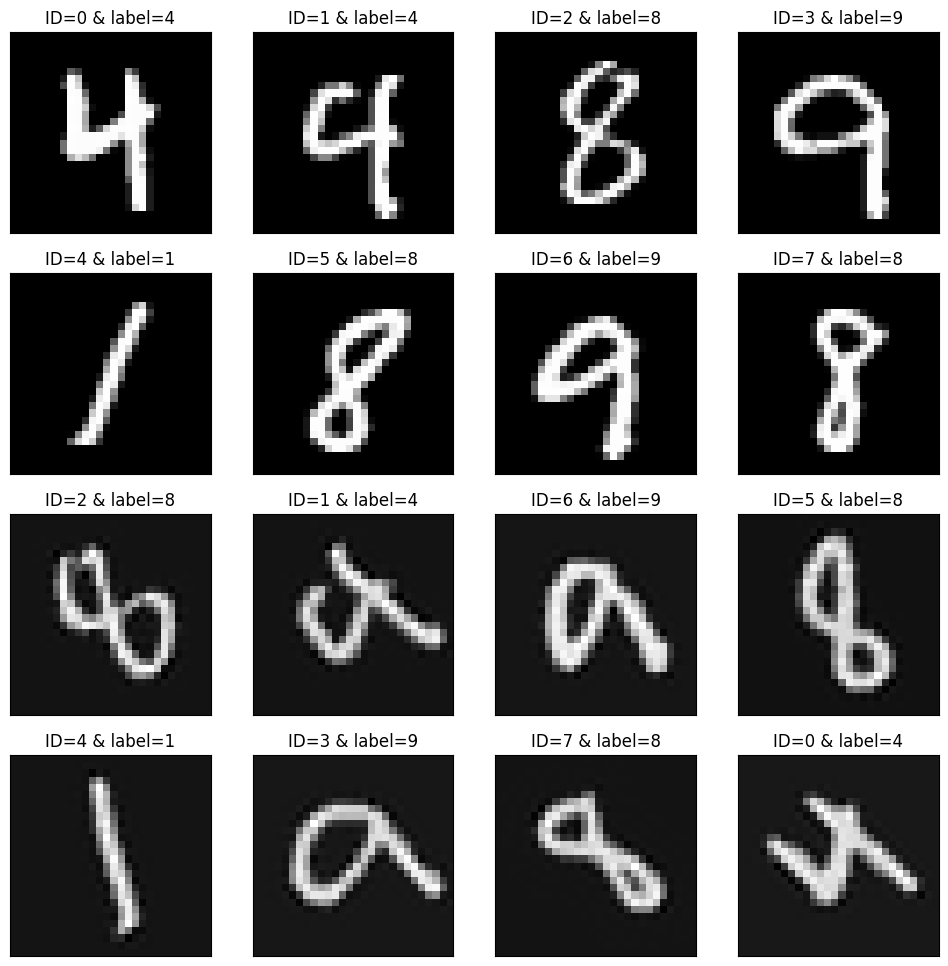

In [4]:
print("Augmented training data")
data_handler.show_img_grid([train_ds['image'][i] for i in range(2*n)],
                           [f'ID={train_ds["id"][i]} & label={train_ds["label"][i]}' for i in range(2*n)])

### CoRe penalty, fixed learning rate

#### D.5 a)

In [2]:
config = configs.mnist_experiment()
m = 1000
c = 100
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist",m,c,bidirec=False)

print(f"\n Pooled model: {m} samples + {c} augmentations")
config.lambda_core = 0.0
state_core = train.train_and_evaluate(config, workdir=f"models/mnist_core_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

print(f"\n\n CoRe model: {m} samples + {c} augmentations")
config.lambda_core = 0.2
state_pooled = train.train_and_evaluate(config, workdir=f"models/mnist_pooled_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

INFO:absl:Load dataset info from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:For 'mnist/3.0.1': fields info.[citation, splits, supervised_keys, module_name] differ on disk and in the code. Keeping the one from code.
INFO:absl:Reusing dataset mnist (/Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1)
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split train, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split test, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1



 Pooled model: 1000 samples + 100 augmentations


INFO:absl:epoch: 1, train_loss: 1.4876, train_accuracy: 54.54, test1_accuracy: 31.15, test2_accuracy: 78.35, core_penalty: 1.0388
INFO:absl:epoch: 2, train_loss: 0.6581, train_accuracy: 82.78, test1_accuracy: 48.33, test2_accuracy: 88.38, core_penalty: 1.8655
INFO:absl:epoch: 3, train_loss: 0.4229, train_accuracy: 89.72, test1_accuracy: 52.57, test2_accuracy: 90.42, core_penalty: 1.1739
INFO:absl:epoch: 4, train_loss: 0.3230, train_accuracy: 93.61, test1_accuracy: 58.76, test2_accuracy: 90.96, core_penalty: 1.7083
INFO:absl:epoch: 5, train_loss: 0.2599, train_accuracy: 96.48, test1_accuracy: 59.67, test2_accuracy: 90.23, core_penalty: 5.0310
INFO:absl:epoch: 6, train_loss: 0.2108, train_accuracy: 97.96, test1_accuracy: 63.06, test2_accuracy: 92.24, core_penalty: 5.3905
INFO:absl:epoch: 7, train_loss: 0.1698, train_accuracy: 99.54, test1_accuracy: 64.58, test2_accuracy: 91.82, core_penalty: 8.7407
INFO:absl:epoch: 8, train_loss: 0.1551, train_accuracy: 99.54, test1_accuracy: 64.95, test



 CoRe model: 1000 samples + 100 augmentations


INFO:absl:epoch: 1, train_loss: 1.5604, train_accuracy: 55.19, test1_accuracy: 42.44, test2_accuracy: 78.87, core_penalty: 0.5745
INFO:absl:epoch: 2, train_loss: 0.8105, train_accuracy: 82.22, test1_accuracy: 53.72, test2_accuracy: 85.92, core_penalty: 0.4613
INFO:absl:epoch: 3, train_loss: 0.5486, train_accuracy: 88.61, test1_accuracy: 55.77, test2_accuracy: 88.02, core_penalty: 0.4824
INFO:absl:epoch: 4, train_loss: 0.5031, train_accuracy: 92.78, test1_accuracy: 62.81, test2_accuracy: 89.14, core_penalty: 0.4012
INFO:absl:epoch: 5, train_loss: 0.4976, train_accuracy: 93.98, test1_accuracy: 64.89, test2_accuracy: 91.18, core_penalty: 0.6070
INFO:absl:epoch: 6, train_loss: 0.4204, train_accuracy: 96.30, test1_accuracy: 67.53, test2_accuracy: 92.51, core_penalty: 0.5408
INFO:absl:epoch: 7, train_loss: 0.4591, train_accuracy: 97.31, test1_accuracy: 68.12, test2_accuracy: 92.34, core_penalty: 0.8269
INFO:absl:epoch: 8, train_loss: 0.4436, train_accuracy: 97.31, test1_accuracy: 69.62, test

In [3]:
config = configs.mnist_experiment()
m = 1000
c = 200
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist",m,c,bidirec=False)

print(f"\n Pooled model: {m} samples + {c} augmentations")
config.lambda_core = 0.0
state_core = train.train_and_evaluate(config, workdir=f"models/mnist_core_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

print(f"\n\n CoRe model: {m} samples + {c} augmentations")
config.lambda_core = 0.2
state_pooled = train.train_and_evaluate(config, workdir=f"models/mnist_pooled_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

INFO:absl:Load dataset info from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:For 'mnist/3.0.1': fields info.[citation, splits, supervised_keys, module_name] differ on disk and in the code. Keeping the one from code.
INFO:absl:Reusing dataset mnist (/Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1)
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split train, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split test, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1



 Pooled model: 1000 samples + 200 augmentations


INFO:absl:epoch: 1, train_loss: 1.5819, train_accuracy: 52.17, test1_accuracy: 41.98, test2_accuracy: 79.95, core_penalty: 0.9887
INFO:absl:epoch: 2, train_loss: 0.6897, train_accuracy: 82.83, test1_accuracy: 64.69, test2_accuracy: 87.55, core_penalty: 1.1164
INFO:absl:epoch: 3, train_loss: 0.4377, train_accuracy: 90.08, test1_accuracy: 70.46, test2_accuracy: 91.34, core_penalty: 0.9552
INFO:absl:epoch: 4, train_loss: 0.3093, train_accuracy: 94.67, test1_accuracy: 74.84, test2_accuracy: 91.27, core_penalty: 3.4056
INFO:absl:epoch: 5, train_loss: 0.2340, train_accuracy: 97.42, test1_accuracy: 76.18, test2_accuracy: 92.67, core_penalty: 3.1893
INFO:absl:epoch: 6, train_loss: 0.1848, train_accuracy: 99.08, test1_accuracy: 75.05, test2_accuracy: 92.53, core_penalty: 6.3337
INFO:absl:epoch: 7, train_loss: 0.1672, train_accuracy: 99.42, test1_accuracy: 74.42, test2_accuracy: 92.57, core_penalty: 4.8935
INFO:absl:epoch: 8, train_loss: 0.1557, train_accuracy: 99.83, test1_accuracy: 73.89, test



 CoRe model: 1000 samples + 200 augmentations


INFO:absl:epoch: 1, train_loss: 1.6695, train_accuracy: 52.25, test1_accuracy: 48.90, test2_accuracy: 77.91, core_penalty: 0.5549
INFO:absl:epoch: 2, train_loss: 0.8498, train_accuracy: 81.83, test1_accuracy: 63.62, test2_accuracy: 87.66, core_penalty: 0.4068
INFO:absl:epoch: 3, train_loss: 0.5594, train_accuracy: 89.92, test1_accuracy: 70.40, test2_accuracy: 90.56, core_penalty: 0.4588
INFO:absl:epoch: 4, train_loss: 0.4933, train_accuracy: 94.25, test1_accuracy: 76.64, test2_accuracy: 91.40, core_penalty: 0.5096
INFO:absl:epoch: 5, train_loss: 0.4039, train_accuracy: 96.50, test1_accuracy: 77.30, test2_accuracy: 91.85, core_penalty: 0.4855
INFO:absl:epoch: 6, train_loss: 0.4725, train_accuracy: 96.67, test1_accuracy: 74.28, test2_accuracy: 90.70, core_penalty: 0.8189
INFO:absl:epoch: 7, train_loss: 0.5104, train_accuracy: 95.75, test1_accuracy: 72.23, test2_accuracy: 91.49, core_penalty: 0.5793
INFO:absl:epoch: 8, train_loss: 0.4542, train_accuracy: 96.25, test1_accuracy: 74.15, test

In [4]:
config = configs.mnist_experiment()
m = 1000
c = 500
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist",m,c,bidirec=False)

print(f"\n Pooled model: {m} samples + {c} augmentations")
config.lambda_core = 0.0
state_core = train.train_and_evaluate(config, workdir=f"models/mnist_core_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

print(f"\n\n CoRe model: {m} samples + {c} augmentations")
config.lambda_core = 0.2
state_pooled = train.train_and_evaluate(config, workdir=f"models/mnist_pooled_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

INFO:absl:Load dataset info from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:For 'mnist/3.0.1': fields info.[citation, splits, supervised_keys, module_name] differ on disk and in the code. Keeping the one from code.
INFO:absl:Reusing dataset mnist (/Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1)
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split train, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split test, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1



 Pooled model: 1000 samples + 500 augmentations


INFO:absl:epoch: 1, train_loss: 1.5474, train_accuracy: 50.63, test1_accuracy: 61.98, test2_accuracy: 77.88, core_penalty: 0.4389
INFO:absl:epoch: 2, train_loss: 0.7075, train_accuracy: 80.56, test1_accuracy: 76.25, test2_accuracy: 87.43, core_penalty: 1.1449
INFO:absl:epoch: 3, train_loss: 0.4949, train_accuracy: 87.85, test1_accuracy: 80.53, test2_accuracy: 90.28, core_penalty: 1.5230
INFO:absl:epoch: 4, train_loss: 0.3289, train_accuracy: 94.58, test1_accuracy: 84.10, test2_accuracy: 91.60, core_penalty: 2.5633
INFO:absl:epoch: 5, train_loss: 0.2610, train_accuracy: 96.67, test1_accuracy: 82.93, test2_accuracy: 91.24, core_penalty: 3.3750
INFO:absl:epoch: 6, train_loss: 0.2118, train_accuracy: 97.92, test1_accuracy: 85.27, test2_accuracy: 92.28, core_penalty: 3.4556
INFO:absl:epoch: 7, train_loss: 0.1809, train_accuracy: 99.10, test1_accuracy: 85.45, test2_accuracy: 92.01, core_penalty: 4.5846
INFO:absl:epoch: 8, train_loss: 0.1781, train_accuracy: 99.03, test1_accuracy: 84.95, test



 CoRe model: 1000 samples + 500 augmentations


INFO:absl:epoch: 1, train_loss: 1.6075, train_accuracy: 50.07, test1_accuracy: 65.57, test2_accuracy: 76.46, core_penalty: 0.2579
INFO:absl:epoch: 2, train_loss: 0.8673, train_accuracy: 80.14, test1_accuracy: 75.26, test2_accuracy: 88.00, core_penalty: 0.5101
INFO:absl:epoch: 3, train_loss: 0.6489, train_accuracy: 87.36, test1_accuracy: 82.78, test2_accuracy: 90.74, core_penalty: 0.4935
INFO:absl:epoch: 4, train_loss: 0.5128, train_accuracy: 93.26, test1_accuracy: 83.80, test2_accuracy: 91.89, core_penalty: 0.6269
INFO:absl:epoch: 5, train_loss: 0.4716, train_accuracy: 95.83, test1_accuracy: 87.26, test2_accuracy: 92.93, core_penalty: 0.5016
INFO:absl:epoch: 6, train_loss: 0.4410, train_accuracy: 96.60, test1_accuracy: 86.35, test2_accuracy: 92.20, core_penalty: 0.6302
INFO:absl:epoch: 7, train_loss: 0.4261, train_accuracy: 96.53, test1_accuracy: 86.46, test2_accuracy: 92.26, core_penalty: 0.4573
INFO:absl:epoch: 8, train_loss: 0.4056, train_accuracy: 98.06, test1_accuracy: 87.85, test

In [5]:
config = configs.mnist_experiment()
m = 1000
c = 1000
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist",m,c,bidirec=False)

print(f"\n Pooled model: {m} samples + {c} augmentations")
config.lambda_core = 0.0
state_core = train.train_and_evaluate(config, workdir=f"models/mnist_core_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

print(f"\n\n CoRe model: {m} samples + {c} augmentations")
config.lambda_core = 0.2
state_pooled = train.train_and_evaluate(config, workdir=f"models/mnist_pooled_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

INFO:absl:Load dataset info from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:For 'mnist/3.0.1': fields info.[citation, splits, supervised_keys, module_name] differ on disk and in the code. Keeping the one from code.
INFO:absl:Reusing dataset mnist (/Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1)
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split train, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split test, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1



 Pooled model: 1000 samples + 1000 augmentations


INFO:absl:epoch: 1, train_loss: 1.3243, train_accuracy: 57.60, test1_accuracy: 79.53, test2_accuracy: 83.27, core_penalty: 0.6912
INFO:absl:epoch: 2, train_loss: 0.5636, train_accuracy: 85.36, test1_accuracy: 86.22, test2_accuracy: 89.16, core_penalty: 1.5091
INFO:absl:epoch: 3, train_loss: 0.4018, train_accuracy: 91.56, test1_accuracy: 87.27, test2_accuracy: 90.54, core_penalty: 2.2996
INFO:absl:epoch: 4, train_loss: 0.3050, train_accuracy: 94.32, test1_accuracy: 87.73, test2_accuracy: 90.03, core_penalty: 2.4045
INFO:absl:epoch: 5, train_loss: 0.2674, train_accuracy: 95.57, test1_accuracy: 88.62, test2_accuracy: 90.62, core_penalty: 3.4449
INFO:absl:epoch: 6, train_loss: 0.2435, train_accuracy: 96.98, test1_accuracy: 89.61, test2_accuracy: 89.92, core_penalty: 3.1069
INFO:absl:epoch: 7, train_loss: 0.2250, train_accuracy: 97.29, test1_accuracy: 88.85, test2_accuracy: 90.40, core_penalty: 3.3941
INFO:absl:epoch: 8, train_loss: 0.2193, train_accuracy: 97.60, test1_accuracy: 90.28, test



 CoRe model: 1000 samples + 1000 augmentations


INFO:absl:epoch: 1, train_loss: 1.3978, train_accuracy: 57.92, test1_accuracy: 78.13, test2_accuracy: 82.12, core_penalty: 0.3532
INFO:absl:epoch: 2, train_loss: 0.7417, train_accuracy: 84.95, test1_accuracy: 85.65, test2_accuracy: 88.28, core_penalty: 0.6202
INFO:absl:epoch: 3, train_loss: 0.5713, train_accuracy: 91.72, test1_accuracy: 88.69, test2_accuracy: 90.68, core_penalty: 0.5614
INFO:absl:epoch: 4, train_loss: 0.4560, train_accuracy: 94.64, test1_accuracy: 90.04, test2_accuracy: 91.69, core_penalty: 0.4423
INFO:absl:epoch: 5, train_loss: 0.4577, train_accuracy: 94.84, test1_accuracy: 90.48, test2_accuracy: 91.25, core_penalty: 0.5429
INFO:absl:epoch: 6, train_loss: 0.4269, train_accuracy: 96.15, test1_accuracy: 90.51, test2_accuracy: 92.22, core_penalty: 0.4440
INFO:absl:epoch: 7, train_loss: 0.3711, train_accuracy: 96.98, test1_accuracy: 92.07, test2_accuracy: 92.26, core_penalty: 0.4015
INFO:absl:epoch: 8, train_loss: 0.4000, train_accuracy: 97.76, test1_accuracy: 91.87, test

#### D.5 b)

In [6]:
config = configs.mnist_experiment()
m = 10000
c = 100
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist",m,c,bidirec=False)

print(f"\n Pooled model: {m} samples + {c} augmentations")
config.lambda_core = 0.0
state_core = train.train_and_evaluate(config, workdir=f"models/mnist_core_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

print(f"\n\n CoRe model: {m} samples + {c} augmentations")
config.lambda_core = 0.2
state_pooled = train.train_and_evaluate(config, workdir=f"models/mnist_pooled_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

INFO:absl:Load dataset info from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:For 'mnist/3.0.1': fields info.[citation, splits, supervised_keys, module_name] differ on disk and in the code. Keeping the one from code.
INFO:absl:Reusing dataset mnist (/Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1)
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split train, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split test, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1



 Pooled model: 10000 samples + 100 augmentations


INFO:absl:epoch: 1, train_loss: 0.5636, train_accuracy: 87.06, test1_accuracy: 47.16, test2_accuracy: 95.61, core_penalty: 0.3815
INFO:absl:epoch: 2, train_loss: 0.2770, train_accuracy: 95.37, test1_accuracy: 60.25, test2_accuracy: 96.79, core_penalty: 0.1153
INFO:absl:epoch: 3, train_loss: 0.2299, train_accuracy: 96.53, test1_accuracy: 56.33, test2_accuracy: 96.49, core_penalty: 0.0504
INFO:absl:epoch: 4, train_loss: 0.2205, train_accuracy: 96.81, test1_accuracy: 61.20, test2_accuracy: 96.67, core_penalty: 0.0426
INFO:absl:epoch: 5, train_loss: 0.2101, train_accuracy: 97.09, test1_accuracy: 64.93, test2_accuracy: 97.29, core_penalty: 0.0000
INFO:absl:epoch: 6, train_loss: 0.1973, train_accuracy: 97.16, test1_accuracy: 59.10, test2_accuracy: 97.23, core_penalty: 0.0301
INFO:absl:epoch: 7, train_loss: 0.2070, train_accuracy: 97.11, test1_accuracy: 61.22, test2_accuracy: 97.23, core_penalty: 0.0000
INFO:absl:epoch: 8, train_loss: 0.1970, train_accuracy: 97.41, test1_accuracy: 63.26, test



 CoRe model: 10000 samples + 100 augmentations


INFO:absl:epoch: 1, train_loss: 0.6547, train_accuracy: 86.16, test1_accuracy: 45.22, test2_accuracy: 94.12, core_penalty: 0.2458
INFO:absl:epoch: 2, train_loss: 0.3254, train_accuracy: 94.80, test1_accuracy: 57.03, test2_accuracy: 96.35, core_penalty: 0.0562
INFO:absl:epoch: 3, train_loss: 0.2827, train_accuracy: 95.98, test1_accuracy: 53.11, test2_accuracy: 95.94, core_penalty: 0.0559
INFO:absl:epoch: 4, train_loss: 0.2653, train_accuracy: 96.43, test1_accuracy: 61.61, test2_accuracy: 97.06, core_penalty: 0.0394
INFO:absl:epoch: 5, train_loss: 0.2132, train_accuracy: 97.06, test1_accuracy: 66.21, test2_accuracy: 97.31, core_penalty: 0.0000
INFO:absl:epoch: 6, train_loss: 0.2136, train_accuracy: 97.05, test1_accuracy: 57.87, test2_accuracy: 96.77, core_penalty: 0.0220
INFO:absl:epoch: 7, train_loss: 0.2088, train_accuracy: 97.22, test1_accuracy: 56.34, test2_accuracy: 97.09, core_penalty: 0.0000
INFO:absl:epoch: 8, train_loss: 0.2081, train_accuracy: 97.38, test1_accuracy: 61.45, test

In [7]:
config = configs.mnist_experiment()
m = 10000
c = 200
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist",m,c,bidirec=False)

print(f"\n Pooled model: {m} samples + {c} augmentations")
config.lambda_core = 0.0
state_core = train.train_and_evaluate(config, workdir=f"models/mnist_core_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

print(f"\n\n CoRe model: {m} samples + {c} augmentations")
config.lambda_core = 0.2
state_pooled = train.train_and_evaluate(config, workdir=f"models/mnist_pooled_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

INFO:absl:Load dataset info from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:For 'mnist/3.0.1': fields info.[citation, splits, supervised_keys, module_name] differ on disk and in the code. Keeping the one from code.
INFO:absl:Reusing dataset mnist (/Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1)
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split train, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split test, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1



 Pooled model: 10000 samples + 200 augmentations


INFO:absl:epoch: 1, train_loss: 0.5627, train_accuracy: 86.43, test1_accuracy: 59.64, test2_accuracy: 96.27, core_penalty: 0.1314
INFO:absl:epoch: 2, train_loss: 0.2722, train_accuracy: 95.39, test1_accuracy: 67.38, test2_accuracy: 96.31, core_penalty: 0.0762
INFO:absl:epoch: 3, train_loss: 0.2380, train_accuracy: 96.36, test1_accuracy: 66.63, test2_accuracy: 96.45, core_penalty: 0.1199
INFO:absl:epoch: 4, train_loss: 0.2267, train_accuracy: 96.54, test1_accuracy: 67.95, test2_accuracy: 97.15, core_penalty: 0.2437
INFO:absl:epoch: 5, train_loss: 0.2115, train_accuracy: 97.09, test1_accuracy: 70.30, test2_accuracy: 96.30, core_penalty: 0.1014
INFO:absl:epoch: 6, train_loss: 0.2085, train_accuracy: 97.09, test1_accuracy: 66.96, test2_accuracy: 97.03, core_penalty: 0.0443
INFO:absl:epoch: 7, train_loss: 0.2014, train_accuracy: 97.35, test1_accuracy: 67.69, test2_accuracy: 97.01, core_penalty: 0.0000
INFO:absl:epoch: 8, train_loss: 0.1956, train_accuracy: 97.60, test1_accuracy: 68.62, test



 CoRe model: 10000 samples + 200 augmentations


INFO:absl:epoch: 1, train_loss: 0.6303, train_accuracy: 85.95, test1_accuracy: 47.00, test2_accuracy: 95.05, core_penalty: 0.1526
INFO:absl:epoch: 2, train_loss: 0.3331, train_accuracy: 95.04, test1_accuracy: 64.33, test2_accuracy: 96.97, core_penalty: 0.0503
INFO:absl:epoch: 3, train_loss: 0.3273, train_accuracy: 95.61, test1_accuracy: 65.01, test2_accuracy: 96.67, core_penalty: 0.1105
INFO:absl:epoch: 4, train_loss: 0.3271, train_accuracy: 95.77, test1_accuracy: 66.21, test2_accuracy: 95.87, core_penalty: 0.1596
INFO:absl:epoch: 5, train_loss: 0.2809, train_accuracy: 96.67, test1_accuracy: 71.00, test2_accuracy: 97.18, core_penalty: 0.0769
INFO:absl:epoch: 6, train_loss: 0.2737, train_accuracy: 96.46, test1_accuracy: 72.88, test2_accuracy: 97.36, core_penalty: 0.0406
INFO:absl:epoch: 7, train_loss: 0.1994, train_accuracy: 97.77, test1_accuracy: 70.98, test2_accuracy: 97.39, core_penalty: 0.0000
INFO:absl:epoch: 8, train_loss: 0.2047, train_accuracy: 97.38, test1_accuracy: 64.57, test

In [8]:
config = configs.mnist_experiment()
m = 10000
c = 500
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist",m,c,bidirec=False)

print(f"\n Pooled model: {m} samples + {c} augmentations")
config.lambda_core = 0.0
state_core = train.train_and_evaluate(config, workdir=f"models/mnist_core_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

print(f"\n\n CoRe model: {m} samples + {c} augmentations")
config.lambda_core = 0.2
state_pooled = train.train_and_evaluate(config, workdir=f"models/mnist_pooled_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

INFO:absl:Load dataset info from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:For 'mnist/3.0.1': fields info.[citation, splits, supervised_keys, module_name] differ on disk and in the code. Keeping the one from code.
INFO:absl:Reusing dataset mnist (/Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1)
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split train, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split test, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1



 Pooled model: 10000 samples + 500 augmentations


INFO:absl:epoch: 1, train_loss: 0.5696, train_accuracy: 86.02, test1_accuracy: 72.52, test2_accuracy: 94.89, core_penalty: 0.0557
INFO:absl:epoch: 2, train_loss: 0.2947, train_accuracy: 95.09, test1_accuracy: 78.30, test2_accuracy: 95.89, core_penalty: 0.2085
INFO:absl:epoch: 3, train_loss: 0.2542, train_accuracy: 95.92, test1_accuracy: 80.20, test2_accuracy: 95.85, core_penalty: 0.1146
INFO:absl:epoch: 4, train_loss: 0.2411, train_accuracy: 96.69, test1_accuracy: 81.28, test2_accuracy: 96.19, core_penalty: 0.0207
INFO:absl:epoch: 5, train_loss: 0.2348, train_accuracy: 96.62, test1_accuracy: 80.58, test2_accuracy: 95.79, core_penalty: 0.0855
INFO:absl:epoch: 6, train_loss: 0.2298, train_accuracy: 96.78, test1_accuracy: 79.97, test2_accuracy: 96.63, core_penalty: 0.0992
INFO:absl:epoch: 7, train_loss: 0.2235, train_accuracy: 97.12, test1_accuracy: 79.74, test2_accuracy: 96.69, core_penalty: 0.2687
INFO:absl:epoch: 8, train_loss: 0.2193, train_accuracy: 97.26, test1_accuracy: 80.01, test



 CoRe model: 10000 samples + 500 augmentations


INFO:absl:epoch: 1, train_loss: 0.5901, train_accuracy: 85.84, test1_accuracy: 72.20, test2_accuracy: 95.77, core_penalty: 0.0491
INFO:absl:epoch: 2, train_loss: 0.3961, train_accuracy: 94.10, test1_accuracy: 76.78, test2_accuracy: 94.52, core_penalty: 0.2063
INFO:absl:epoch: 3, train_loss: 0.3641, train_accuracy: 95.19, test1_accuracy: 80.45, test2_accuracy: 95.94, core_penalty: 0.1229
INFO:absl:epoch: 4, train_loss: 0.2821, train_accuracy: 96.50, test1_accuracy: 79.56, test2_accuracy: 95.89, core_penalty: 0.0240
INFO:absl:epoch: 5, train_loss: 0.3071, train_accuracy: 95.79, test1_accuracy: 80.43, test2_accuracy: 96.06, core_penalty: 0.1051
INFO:absl:epoch: 6, train_loss: 0.2878, train_accuracy: 96.35, test1_accuracy: 79.30, test2_accuracy: 96.22, core_penalty: 0.0665
INFO:absl:epoch: 7, train_loss: 0.4568, train_accuracy: 94.33, test1_accuracy: 78.36, test2_accuracy: 95.88, core_penalty: 0.3170
INFO:absl:epoch: 8, train_loss: 0.3923, train_accuracy: 95.67, test1_accuracy: 79.91, test

In [9]:
config = configs.mnist_experiment()
m = 10000
c = 1000
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist",m,c,bidirec=False)

print(f"\n Pooled model: {m} samples + {c} augmentations")
config.lambda_core = 0.0
state_core = train.train_and_evaluate(config, workdir=f"models/mnist_core_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

print(f"\n\n CoRe model: {m} samples + {c} augmentations")
config.lambda_core = 0.2
state_pooled = train.train_and_evaluate(config, workdir=f"models/mnist_pooled_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

INFO:absl:Load dataset info from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:For 'mnist/3.0.1': fields info.[citation, splits, supervised_keys, module_name] differ on disk and in the code. Keeping the one from code.
INFO:absl:Reusing dataset mnist (/Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1)
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split train, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split test, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1



 Pooled model: 10000 samples + 1000 augmentations


INFO:absl:epoch: 1, train_loss: 0.5770, train_accuracy: 86.24, test1_accuracy: 82.31, test2_accuracy: 95.28, core_penalty: 0.1565
INFO:absl:epoch: 2, train_loss: 0.3211, train_accuracy: 94.61, test1_accuracy: 83.12, test2_accuracy: 95.69, core_penalty: 0.2346
INFO:absl:epoch: 3, train_loss: 0.2853, train_accuracy: 95.38, test1_accuracy: 87.31, test2_accuracy: 96.96, core_penalty: 0.2370
INFO:absl:epoch: 4, train_loss: 0.2632, train_accuracy: 96.09, test1_accuracy: 86.37, test2_accuracy: 97.27, core_penalty: 0.1672
INFO:absl:epoch: 5, train_loss: 0.2557, train_accuracy: 96.27, test1_accuracy: 88.81, test2_accuracy: 96.87, core_penalty: 0.1431
INFO:absl:epoch: 6, train_loss: 0.2469, train_accuracy: 96.66, test1_accuracy: 86.64, test2_accuracy: 97.07, core_penalty: 0.1401
INFO:absl:epoch: 7, train_loss: 0.2479, train_accuracy: 96.36, test1_accuracy: 85.93, test2_accuracy: 96.63, core_penalty: 0.2598
INFO:absl:epoch: 8, train_loss: 0.2412, train_accuracy: 96.88, test1_accuracy: 84.00, test



 CoRe model: 10000 samples + 1000 augmentations


INFO:absl:epoch: 1, train_loss: 0.6396, train_accuracy: 85.66, test1_accuracy: 76.45, test2_accuracy: 94.32, core_penalty: 0.1364
INFO:absl:epoch: 2, train_loss: 0.4484, train_accuracy: 93.38, test1_accuracy: 78.19, test2_accuracy: 95.91, core_penalty: 0.2152
INFO:absl:epoch: 3, train_loss: 0.4054, train_accuracy: 94.87, test1_accuracy: 85.21, test2_accuracy: 96.71, core_penalty: 0.1705
INFO:absl:epoch: 4, train_loss: 0.3472, train_accuracy: 95.56, test1_accuracy: 85.43, test2_accuracy: 96.94, core_penalty: 0.0986
INFO:absl:epoch: 5, train_loss: 0.3473, train_accuracy: 95.98, test1_accuracy: 83.55, test2_accuracy: 96.44, core_penalty: 0.1645
INFO:absl:epoch: 6, train_loss: 0.3432, train_accuracy: 96.12, test1_accuracy: 86.77, test2_accuracy: 96.77, core_penalty: 0.1378
INFO:absl:epoch: 7, train_loss: 0.3567, train_accuracy: 95.99, test1_accuracy: 87.22, test2_accuracy: 96.90, core_penalty: 0.1717
INFO:absl:epoch: 8, train_loss: 0.3263, train_accuracy: 96.22, test1_accuracy: 87.10, test

In [10]:
config = configs.mnist_experiment()
m = 10000
c = 2000
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist",m,c,bidirec=False)

print(f"\n Pooled model: {m} samples + {c} augmentations")
config.lambda_core = 0.0
state_core = train.train_and_evaluate(config, workdir=f"models/mnist_core_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

print(f"\n\n CoRe model: {m} samples + {c} augmentations")
config.lambda_core = 0.2
state_pooled = train.train_and_evaluate(config, workdir=f"models/mnist_pooled_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

INFO:absl:Load dataset info from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:For 'mnist/3.0.1': fields info.[citation, splits, supervised_keys, module_name] differ on disk and in the code. Keeping the one from code.
INFO:absl:Reusing dataset mnist (/Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1)
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split train, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split test, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1



 Pooled model: 10000 samples + 2000 augmentations


INFO:absl:epoch: 1, train_loss: 0.5663, train_accuracy: 86.33, test1_accuracy: 85.56, test2_accuracy: 94.43, core_penalty: 0.5265
INFO:absl:epoch: 2, train_loss: 0.3116, train_accuracy: 94.73, test1_accuracy: 84.23, test2_accuracy: 95.28, core_penalty: 0.3185
INFO:absl:epoch: 3, train_loss: 0.2868, train_accuracy: 95.40, test1_accuracy: 89.55, test2_accuracy: 95.96, core_penalty: 0.5987
INFO:absl:epoch: 4, train_loss: 0.2664, train_accuracy: 96.07, test1_accuracy: 89.57, test2_accuracy: 96.69, core_penalty: 0.4242
INFO:absl:epoch: 5, train_loss: 0.2611, train_accuracy: 96.27, test1_accuracy: 88.86, test2_accuracy: 96.65, core_penalty: 0.5841
INFO:absl:epoch: 6, train_loss: 0.2507, train_accuracy: 96.27, test1_accuracy: 89.83, test2_accuracy: 95.51, core_penalty: 0.3973
INFO:absl:epoch: 7, train_loss: 0.2475, train_accuracy: 96.70, test1_accuracy: 90.17, test2_accuracy: 96.53, core_penalty: 0.1854
INFO:absl:epoch: 8, train_loss: 0.2425, train_accuracy: 96.63, test1_accuracy: 89.73, test



 CoRe model: 10000 samples + 2000 augmentations


INFO:absl:epoch: 1, train_loss: 0.6783, train_accuracy: 85.33, test1_accuracy: 86.18, test2_accuracy: 94.85, core_penalty: 0.3330
INFO:absl:epoch: 2, train_loss: 0.4288, train_accuracy: 93.71, test1_accuracy: 87.85, test2_accuracy: 96.15, core_penalty: 0.2068
INFO:absl:epoch: 3, train_loss: 0.4270, train_accuracy: 94.70, test1_accuracy: 88.11, test2_accuracy: 94.52, core_penalty: 0.2877
INFO:absl:epoch: 4, train_loss: 0.3993, train_accuracy: 95.23, test1_accuracy: 89.14, test2_accuracy: 96.45, core_penalty: 0.2098
INFO:absl:epoch: 5, train_loss: 0.4061, train_accuracy: 95.47, test1_accuracy: 89.66, test2_accuracy: 95.96, core_penalty: 0.2884
INFO:absl:epoch: 6, train_loss: 0.3791, train_accuracy: 95.81, test1_accuracy: 89.78, test2_accuracy: 95.38, core_penalty: 0.2163
INFO:absl:epoch: 7, train_loss: 0.3494, train_accuracy: 95.76, test1_accuracy: 90.74, test2_accuracy: 96.82, core_penalty: 0.1071
INFO:absl:epoch: 8, train_loss: 0.3846, train_accuracy: 96.01, test1_accuracy: 89.74, test

In [11]:
config = configs.mnist_experiment()
m = 10000
c = 5000
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist",m,c,bidirec=False)

print(f"\n Pooled model: {m} samples + {c} augmentations")
config.lambda_core = 0.0
state_core = train.train_and_evaluate(config, workdir=f"models/mnist_core_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

print(f"\n\n CoRe model: {m} samples + {c} augmentations")
config.lambda_core = 0.2
state_pooled = train.train_and_evaluate(config, workdir=f"models/mnist_pooled_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

INFO:absl:Load dataset info from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:For 'mnist/3.0.1': fields info.[citation, splits, supervised_keys, module_name] differ on disk and in the code. Keeping the one from code.
INFO:absl:Reusing dataset mnist (/Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1)
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split train, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split test, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1



 Pooled model: 10000 samples + 5000 augmentations


INFO:absl:epoch: 1, train_loss: 0.5709, train_accuracy: 86.23, test1_accuracy: 91.00, test2_accuracy: 95.27, core_penalty: 0.5792
INFO:absl:epoch: 2, train_loss: 0.3266, train_accuracy: 94.51, test1_accuracy: 92.29, test2_accuracy: 95.57, core_penalty: 0.5260
INFO:absl:epoch: 3, train_loss: 0.3014, train_accuracy: 95.03, test1_accuracy: 93.29, test2_accuracy: 95.55, core_penalty: 0.5422
INFO:absl:epoch: 4, train_loss: 0.2954, train_accuracy: 95.45, test1_accuracy: 93.63, test2_accuracy: 94.96, core_penalty: 0.4152
INFO:absl:epoch: 5, train_loss: 0.2820, train_accuracy: 95.73, test1_accuracy: 91.73, test2_accuracy: 96.38, core_penalty: 0.6195
INFO:absl:epoch: 6, train_loss: 0.2754, train_accuracy: 96.02, test1_accuracy: 93.18, test2_accuracy: 96.32, core_penalty: 0.7270
INFO:absl:epoch: 7, train_loss: 0.2724, train_accuracy: 96.18, test1_accuracy: 92.38, test2_accuracy: 96.43, core_penalty: 0.6733
INFO:absl:epoch: 8, train_loss: 0.2764, train_accuracy: 95.90, test1_accuracy: 93.45, test



 CoRe model: 10000 samples + 5000 augmentations


INFO:absl:epoch: 1, train_loss: 0.6947, train_accuracy: 85.44, test1_accuracy: 89.44, test2_accuracy: 93.98, core_penalty: 0.3197
INFO:absl:epoch: 2, train_loss: 0.4684, train_accuracy: 93.71, test1_accuracy: 92.08, test2_accuracy: 95.48, core_penalty: 0.2742
INFO:absl:epoch: 3, train_loss: 0.4577, train_accuracy: 94.58, test1_accuracy: 92.93, test2_accuracy: 96.03, core_penalty: 0.3049
INFO:absl:epoch: 4, train_loss: 0.4334, train_accuracy: 94.95, test1_accuracy: 90.62, test2_accuracy: 95.39, core_penalty: 0.2799
INFO:absl:epoch: 5, train_loss: 0.4617, train_accuracy: 94.94, test1_accuracy: 92.37, test2_accuracy: 95.93, core_penalty: 0.3458
INFO:absl:epoch: 6, train_loss: 0.4435, train_accuracy: 95.19, test1_accuracy: 92.28, test2_accuracy: 95.91, core_penalty: 0.3130
INFO:absl:epoch: 7, train_loss: 0.4336, train_accuracy: 95.08, test1_accuracy: 93.40, test2_accuracy: 95.95, core_penalty: 0.3112
INFO:absl:epoch: 8, train_loss: 0.3668, train_accuracy: 95.85, test1_accuracy: 92.77, test

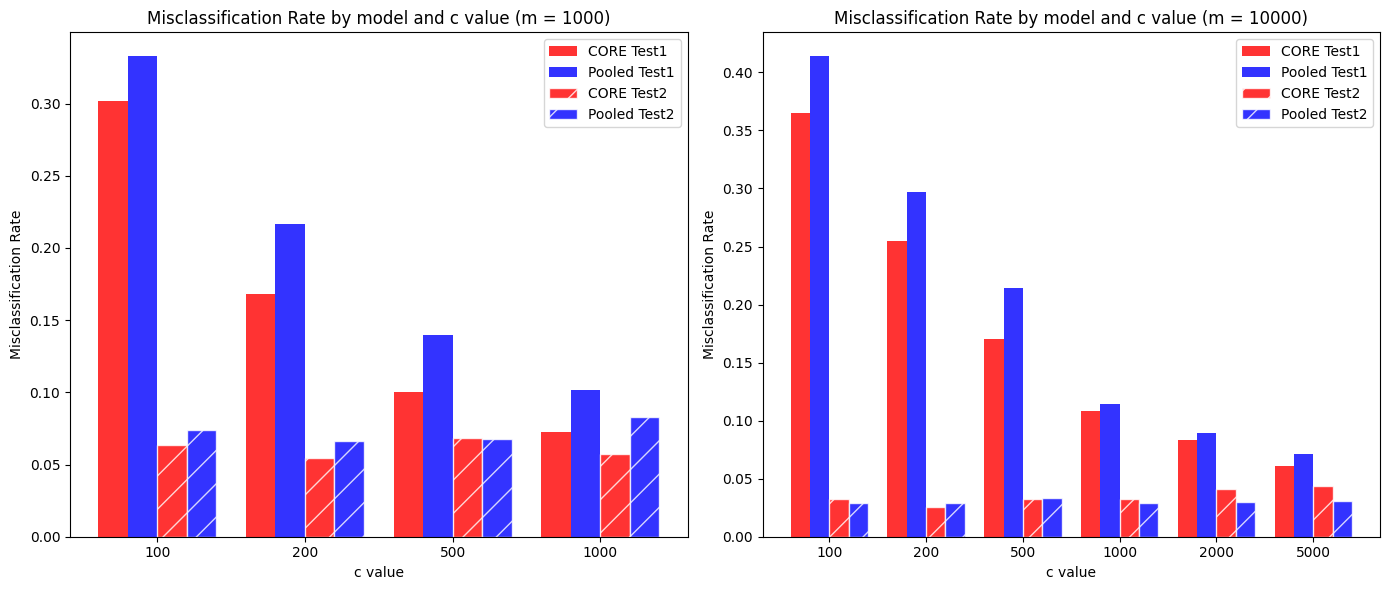

In [4]:
data = []
with open('models/misclass_rates_models.txt', 'r') as file:
    for line in file.readlines():
        parts = line.split(', ')
        model = parts[0].split('_')
        model_name = model[1]
        m = int(model[2])
        c = int(model[3])
        test1_misclass = float(parts[1].split(': ')[1])
        test2_misclass = float(parts[2].split(': ')[1])
        data.append([model_name, m, c, test1_misclass, test2_misclass])

df = pd.DataFrame(data, columns=['Model', 'm', 'c', 'Test1', 'Test2'])
df['Model'] = df['Model'].replace({'core': 'pooled', 'pooled': 'core'})  # Mistake in the file

df_pivot = df.pivot_table(index=['m', 'c'], columns='Model', values=['Test1', 'Test2']).reset_index()
df_pivot.columns = ['m', 'c', 'Core_Test1', 'Pooled_Test1', 'Core_Test2', 'Pooled_Test2']

def plot_bars(df, m_value, ax):
    subset = df[df['m'] == m_value]

    bar_width = 0.2
    index = np.arange(len(subset))
    opacity = 0.8

    rects1 = ax.bar(index - bar_width, subset['Core_Test1'], bar_width, alpha=opacity, color='red', label='CORE Test1')
    rects2 = ax.bar(index, subset['Pooled_Test1'], bar_width, alpha=opacity, color='blue', label='Pooled Test1')
    rects3 = ax.bar(index + bar_width, subset['Core_Test2'], bar_width, alpha=opacity, color='red', edgecolor='white', hatch='/', label='CORE Test2')
    rects4 = ax.bar(index + 2 * bar_width, subset['Pooled_Test2'], bar_width, alpha=opacity, color='blue', edgecolor='white', hatch='/', label='Pooled Test2')

    ax.set_xlabel('c value')
    ax.set_ylabel('Misclassification Rate')
    ax.set_title(f'Misclassification Rate by model and c value (m = {m_value})')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(subset['c'])
    ax.legend()

fig, axs = plt.subplots(1, len(df['m'].unique()), figsize=(14, 6))

for i, m_val in enumerate(df['m'].unique()):
    plot_bars(df_pivot, m_val, axs[i])

plt.tight_layout()
plt.show()


#### Decaying learning rate

In [3]:
# Q: better than 66 vs 69?
config = configs.mnist_experiment()
m = 1000
c = 100
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist",m,c,bidirec=False)

print(f"\n Pooled model: {m} samples + {c} augmentations")
config.lambda_core = 0.0
state_core = train.train_and_evaluate(config, workdir=f"models_decay/mnist_pooled_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

print(f"\n\n CoRe model: {m} samples + {c} augmentations")
config.lambda_core = 0.2
state_pooled = train.train_and_evaluate(config, workdir=f"models_decay/mnist_core_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

INFO:absl:Load dataset info from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:For 'mnist/3.0.1': fields info.[citation, splits, supervised_keys, module_name] differ on disk and in the code. Keeping the one from code.
INFO:absl:Reusing dataset mnist (/Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1)
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split train, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split test, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1



 Pooled model: 1000 samples + 100 augmentations


INFO:absl:epoch: 1, train_loss: 1.5535, train_accuracy: 51.20, test1_accuracy: 28.56, test2_accuracy: 82.88, core_penalty: 0.1696
INFO:absl:epoch: 2, train_loss: 0.6808, train_accuracy: 81.67, test1_accuracy: 50.39, test2_accuracy: 88.39, core_penalty: 0.9260
INFO:absl:epoch: 3, train_loss: 0.4329, train_accuracy: 90.00, test1_accuracy: 57.81, test2_accuracy: 90.00, core_penalty: 3.1289
INFO:absl:epoch: 4, train_loss: 0.2941, train_accuracy: 95.09, test1_accuracy: 68.37, test2_accuracy: 92.22, core_penalty: 2.0229
INFO:absl:epoch: 5, train_loss: 0.2212, train_accuracy: 97.69, test1_accuracy: 69.33, test2_accuracy: 92.34, core_penalty: 4.6273
INFO:absl:epoch: 6, train_loss: 0.1808, train_accuracy: 99.26, test1_accuracy: 72.02, test2_accuracy: 92.99, core_penalty: 5.0265
INFO:absl:epoch: 7, train_loss: 0.1681, train_accuracy: 99.26, test1_accuracy: 70.36, test2_accuracy: 92.20, core_penalty: 3.9949
INFO:absl:epoch: 8, train_loss: 0.1543, train_accuracy: 99.81, test1_accuracy: 70.62, test



 CoRe model: 1000 samples + 100 augmentations


INFO:absl:epoch: 1, train_loss: 1.5626, train_accuracy: 51.57, test1_accuracy: 30.32, test2_accuracy: 82.75, core_penalty: 0.1472
INFO:absl:epoch: 2, train_loss: 0.8481, train_accuracy: 83.43, test1_accuracy: 48.12, test2_accuracy: 86.24, core_penalty: 0.4849
INFO:absl:epoch: 3, train_loss: 0.7623, train_accuracy: 89.07, test1_accuracy: 63.42, test2_accuracy: 88.12, core_penalty: 1.2563
INFO:absl:epoch: 4, train_loss: 0.6210, train_accuracy: 90.83, test1_accuracy: 67.67, test2_accuracy: 91.32, core_penalty: 0.4793
INFO:absl:epoch: 5, train_loss: 0.5892, train_accuracy: 93.24, test1_accuracy: 67.43, test2_accuracy: 90.55, core_penalty: 0.8823
INFO:absl:epoch: 6, train_loss: 0.4481, train_accuracy: 96.11, test1_accuracy: 70.98, test2_accuracy: 91.20, core_penalty: 0.3530
INFO:absl:epoch: 7, train_loss: 0.3910, train_accuracy: 96.48, test1_accuracy: 72.78, test2_accuracy: 91.67, core_penalty: 0.4643
INFO:absl:epoch: 8, train_loss: 0.3901, train_accuracy: 98.89, test1_accuracy: 73.78, test

In [4]:
config = configs.mnist_experiment()
m = 1000
c = 200
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist",m,c,bidirec=False)

print(f"\n Pooled model: {m} samples + {c} augmentations")
config.lambda_core = 0.0
state_core = train.train_and_evaluate(config, workdir=f"models_decay/mnist_pooled_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

print(f"\n\n CoRe model: {m} samples + {c} augmentations")
config.lambda_core = 0.2
state_pooled = train.train_and_evaluate(config, workdir=f"models_decay/mnist_core_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

INFO:absl:Load dataset info from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:For 'mnist/3.0.1': fields info.[citation, splits, supervised_keys, module_name] differ on disk and in the code. Keeping the one from code.
INFO:absl:Reusing dataset mnist (/Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1)
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split train, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split test, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1



 Pooled model: 1000 samples + 200 augmentations


INFO:absl:epoch: 1, train_loss: 1.4901, train_accuracy: 52.17, test1_accuracy: 40.03, test2_accuracy: 80.04, core_penalty: 1.0186
INFO:absl:epoch: 2, train_loss: 0.6693, train_accuracy: 82.08, test1_accuracy: 62.89, test2_accuracy: 88.74, core_penalty: 0.8406
INFO:absl:epoch: 3, train_loss: 0.4601, train_accuracy: 90.08, test1_accuracy: 68.73, test2_accuracy: 89.87, core_penalty: 2.6920
INFO:absl:epoch: 4, train_loss: 0.3605, train_accuracy: 93.08, test1_accuracy: 73.12, test2_accuracy: 91.32, core_penalty: 1.3809
INFO:absl:epoch: 5, train_loss: 0.2644, train_accuracy: 96.08, test1_accuracy: 72.51, test2_accuracy: 91.59, core_penalty: 2.2759
INFO:absl:epoch: 6, train_loss: 0.2259, train_accuracy: 97.92, test1_accuracy: 73.23, test2_accuracy: 92.16, core_penalty: 3.8084
INFO:absl:epoch: 7, train_loss: 0.1865, train_accuracy: 99.25, test1_accuracy: 76.55, test2_accuracy: 92.68, core_penalty: 3.7984
INFO:absl:epoch: 8, train_loss: 0.1607, train_accuracy: 99.67, test1_accuracy: 75.97, test



 CoRe model: 1000 samples + 200 augmentations


INFO:absl:epoch: 1, train_loss: 1.5012, train_accuracy: 53.83, test1_accuracy: 49.64, test2_accuracy: 82.10, core_penalty: 0.4465
INFO:absl:epoch: 2, train_loss: 0.7680, train_accuracy: 84.00, test1_accuracy: 67.08, test2_accuracy: 89.28, core_penalty: 0.5409
INFO:absl:epoch: 3, train_loss: 0.6121, train_accuracy: 90.17, test1_accuracy: 72.68, test2_accuracy: 88.15, core_penalty: 0.6356
INFO:absl:epoch: 4, train_loss: 0.5125, train_accuracy: 92.25, test1_accuracy: 75.44, test2_accuracy: 90.56, core_penalty: 0.3617
INFO:absl:epoch: 5, train_loss: 0.4315, train_accuracy: 95.50, test1_accuracy: 77.08, test2_accuracy: 91.63, core_penalty: 0.5182
INFO:absl:epoch: 6, train_loss: 0.4409, train_accuracy: 96.42, test1_accuracy: 79.44, test2_accuracy: 91.98, core_penalty: 0.6214
INFO:absl:epoch: 7, train_loss: 0.4454, train_accuracy: 97.50, test1_accuracy: 78.96, test2_accuracy: 92.64, core_penalty: 0.5923
INFO:absl:epoch: 8, train_loss: 0.3636, train_accuracy: 98.25, test1_accuracy: 79.07, test

In [5]:
config = configs.mnist_experiment()
m = 1000
c = 500
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist",m,c,bidirec=False)

print(f"\n Pooled model: {m} samples + {c} augmentations")
config.lambda_core = 0.0
state_core = train.train_and_evaluate(config, workdir=f"models_decay/mnist_pooled_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

print(f"\n\n CoRe model: {m} samples + {c} augmentations")
config.lambda_core = 0.2
state_pooled = train.train_and_evaluate(config, workdir=f"models_decay/mnist_core_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

INFO:absl:Load dataset info from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:For 'mnist/3.0.1': fields info.[citation, splits, supervised_keys, module_name] differ on disk and in the code. Keeping the one from code.
INFO:absl:Reusing dataset mnist (/Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1)
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split train, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split test, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1



 Pooled model: 1000 samples + 500 augmentations


INFO:absl:epoch: 1, train_loss: 1.6044, train_accuracy: 51.11, test1_accuracy: 61.09, test2_accuracy: 74.35, core_penalty: 0.5762
INFO:absl:epoch: 2, train_loss: 0.8120, train_accuracy: 79.17, test1_accuracy: 76.84, test2_accuracy: 86.61, core_penalty: 0.8873
INFO:absl:epoch: 3, train_loss: 0.5320, train_accuracy: 87.29, test1_accuracy: 80.94, test2_accuracy: 90.52, core_penalty: 1.7438
INFO:absl:epoch: 4, train_loss: 0.3891, train_accuracy: 91.94, test1_accuracy: 84.54, test2_accuracy: 91.66, core_penalty: 1.9556
INFO:absl:epoch: 5, train_loss: 0.2838, train_accuracy: 95.97, test1_accuracy: 85.68, test2_accuracy: 92.84, core_penalty: 3.1458
INFO:absl:epoch: 6, train_loss: 0.2415, train_accuracy: 96.94, test1_accuracy: 86.12, test2_accuracy: 91.78, core_penalty: 3.4766
INFO:absl:epoch: 7, train_loss: 0.2160, train_accuracy: 97.99, test1_accuracy: 85.74, test2_accuracy: 92.95, core_penalty: 4.8042
INFO:absl:epoch: 8, train_loss: 0.1896, train_accuracy: 99.10, test1_accuracy: 84.92, test



 CoRe model: 1000 samples + 500 augmentations


INFO:absl:epoch: 1, train_loss: 1.6371, train_accuracy: 51.67, test1_accuracy: 63.79, test2_accuracy: 73.51, core_penalty: 0.3720
INFO:absl:epoch: 2, train_loss: 0.9381, train_accuracy: 79.86, test1_accuracy: 76.86, test2_accuracy: 87.20, core_penalty: 0.5003
INFO:absl:epoch: 3, train_loss: 0.6665, train_accuracy: 87.08, test1_accuracy: 80.85, test2_accuracy: 89.08, core_penalty: 0.4733
INFO:absl:epoch: 4, train_loss: 0.5953, train_accuracy: 90.90, test1_accuracy: 85.93, test2_accuracy: 91.85, core_penalty: 0.6425
INFO:absl:epoch: 5, train_loss: 0.5072, train_accuracy: 94.58, test1_accuracy: 86.73, test2_accuracy: 92.20, core_penalty: 0.6009
INFO:absl:epoch: 6, train_loss: 0.4588, train_accuracy: 95.69, test1_accuracy: 88.53, test2_accuracy: 92.57, core_penalty: 0.5247
INFO:absl:epoch: 7, train_loss: 0.4625, train_accuracy: 96.74, test1_accuracy: 87.31, test2_accuracy: 92.84, core_penalty: 0.6276
INFO:absl:epoch: 8, train_loss: 0.4199, train_accuracy: 96.39, test1_accuracy: 87.59, test

In [6]:
config = configs.mnist_experiment()
m = 1000
c = 1000
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist",m,c,bidirec=False)

print(f"\n Pooled model: {m} samples + {c} augmentations")
config.lambda_core = 0.0
state_core = train.train_and_evaluate(config, workdir=f"models_decay/mnist_pooled_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

print(f"\n\n CoRe model: {m} samples + {c} augmentations")
config.lambda_core = 0.2
state_pooled = train.train_and_evaluate(config, workdir=f"models_decay/mnist_core_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

INFO:absl:Load dataset info from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:For 'mnist/3.0.1': fields info.[citation, splits, supervised_keys, module_name] differ on disk and in the code. Keeping the one from code.
INFO:absl:Reusing dataset mnist (/Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1)
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split train, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split test, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1



 Pooled model: 1000 samples + 1000 augmentations


INFO:absl:epoch: 1, train_loss: 1.4681, train_accuracy: 53.33, test1_accuracy: 74.57, test2_accuracy: 80.77, core_penalty: 0.5991
INFO:absl:epoch: 2, train_loss: 0.6379, train_accuracy: 82.92, test1_accuracy: 85.22, test2_accuracy: 87.62, core_penalty: 1.1005
INFO:absl:epoch: 3, train_loss: 0.4421, train_accuracy: 89.95, test1_accuracy: 87.39, test2_accuracy: 88.82, core_penalty: 1.7349
INFO:absl:epoch: 4, train_loss: 0.3240, train_accuracy: 94.27, test1_accuracy: 88.74, test2_accuracy: 91.30, core_penalty: 2.0392
INFO:absl:epoch: 5, train_loss: 0.2651, train_accuracy: 95.78, test1_accuracy: 90.32, test2_accuracy: 90.36, core_penalty: 2.5408
INFO:absl:epoch: 6, train_loss: 0.2304, train_accuracy: 97.34, test1_accuracy: 89.59, test2_accuracy: 91.03, core_penalty: 3.3584
INFO:absl:epoch: 7, train_loss: 0.1953, train_accuracy: 98.70, test1_accuracy: 90.56, test2_accuracy: 91.80, core_penalty: 3.7869
INFO:absl:epoch: 8, train_loss: 0.1950, train_accuracy: 98.18, test1_accuracy: 89.70, test



 CoRe model: 1000 samples + 1000 augmentations


INFO:absl:epoch: 1, train_loss: 1.5132, train_accuracy: 53.49, test1_accuracy: 75.31, test2_accuracy: 77.60, core_penalty: 0.3474
INFO:absl:epoch: 2, train_loss: 0.7890, train_accuracy: 82.97, test1_accuracy: 85.90, test2_accuracy: 87.34, core_penalty: 0.4768
INFO:absl:epoch: 3, train_loss: 0.6018, train_accuracy: 90.21, test1_accuracy: 87.78, test2_accuracy: 89.21, core_penalty: 0.5462
INFO:absl:epoch: 4, train_loss: 0.5037, train_accuracy: 94.06, test1_accuracy: 89.13, test2_accuracy: 91.19, core_penalty: 0.5648
INFO:absl:epoch: 5, train_loss: 0.4303, train_accuracy: 95.21, test1_accuracy: 91.37, test2_accuracy: 90.18, core_penalty: 0.4642
INFO:absl:epoch: 6, train_loss: 0.4349, train_accuracy: 95.94, test1_accuracy: 91.17, test2_accuracy: 92.33, core_penalty: 0.5189
INFO:absl:epoch: 7, train_loss: 0.4153, train_accuracy: 96.82, test1_accuracy: 90.86, test2_accuracy: 92.79, core_penalty: 0.4912
INFO:absl:epoch: 8, train_loss: 0.3959, train_accuracy: 97.24, test1_accuracy: 91.02, test

In [7]:
config = configs.mnist_experiment()
m = 10000
c = 100
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist",m,c,bidirec=False)

print(f"\n Pooled model: {m} samples + {c} augmentations")
config.lambda_core = 0.0
state_core = train.train_and_evaluate(config, workdir=f"models_decay/mnist_pooled_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

print(f"\n\n CoRe model: {m} samples + {c} augmentations")
config.lambda_core = 0.2
state_pooled = train.train_and_evaluate(config, workdir=f"models_decay/mnist_core_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

INFO:absl:Load dataset info from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:For 'mnist/3.0.1': fields info.[citation, splits, supervised_keys, module_name] differ on disk and in the code. Keeping the one from code.
INFO:absl:Reusing dataset mnist (/Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1)
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split train, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split test, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1



 Pooled model: 10000 samples + 100 augmentations


INFO:absl:epoch: 1, train_loss: 0.5492, train_accuracy: 86.73, test1_accuracy: 48.74, test2_accuracy: 95.05, core_penalty: 0.0090
INFO:absl:epoch: 2, train_loss: 0.2589, train_accuracy: 95.64, test1_accuracy: 55.81, test2_accuracy: 96.66, core_penalty: 0.0515
INFO:absl:epoch: 3, train_loss: 0.2208, train_accuracy: 96.54, test1_accuracy: 60.47, test2_accuracy: 96.34, core_penalty: 0.1959
INFO:absl:epoch: 4, train_loss: 0.2002, train_accuracy: 97.22, test1_accuracy: 59.70, test2_accuracy: 96.84, core_penalty: 0.0000
INFO:absl:epoch: 5, train_loss: 0.1931, train_accuracy: 97.20, test1_accuracy: 53.97, test2_accuracy: 96.47, core_penalty: 0.1454
INFO:absl:epoch: 6, train_loss: 0.1914, train_accuracy: 97.28, test1_accuracy: 62.24, test2_accuracy: 96.77, core_penalty: 0.0412
INFO:absl:epoch: 7, train_loss: 0.1939, train_accuracy: 97.43, test1_accuracy: 63.46, test2_accuracy: 96.40, core_penalty: 0.0000
INFO:absl:epoch: 8, train_loss: 0.1916, train_accuracy: 97.34, test1_accuracy: 65.28, test



 CoRe model: 10000 samples + 100 augmentations


INFO:absl:epoch: 1, train_loss: 0.5522, train_accuracy: 86.62, test1_accuracy: 49.43, test2_accuracy: 95.06, core_penalty: 0.0090
INFO:absl:epoch: 2, train_loss: 0.2812, train_accuracy: 95.33, test1_accuracy: 53.77, test2_accuracy: 95.36, core_penalty: 0.0472
INFO:absl:epoch: 3, train_loss: 0.3449, train_accuracy: 95.22, test1_accuracy: 59.67, test2_accuracy: 96.54, core_penalty: 0.1373
INFO:absl:epoch: 4, train_loss: 0.2282, train_accuracy: 97.09, test1_accuracy: 63.14, test2_accuracy: 96.80, core_penalty: 0.0000
INFO:absl:epoch: 5, train_loss: 0.2544, train_accuracy: 96.70, test1_accuracy: 60.65, test2_accuracy: 97.27, core_penalty: 0.0710
INFO:absl:epoch: 6, train_loss: 0.2184, train_accuracy: 97.31, test1_accuracy: 60.15, test2_accuracy: 96.98, core_penalty: 0.0291
INFO:absl:epoch: 7, train_loss: 0.1945, train_accuracy: 97.50, test1_accuracy: 63.75, test2_accuracy: 96.64, core_penalty: 0.0000
INFO:absl:epoch: 8, train_loss: 0.3092, train_accuracy: 96.19, test1_accuracy: 63.37, test

In [8]:
config = configs.mnist_experiment()
m = 10000
c = 200
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist",m,c,bidirec=False)

print(f"\n Pooled model: {m} samples + {c} augmentations")
config.lambda_core = 0.0
state_core = train.train_and_evaluate(config, workdir=f"models_decay/mnist_pooled_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

print(f"\n\n CoRe model: {m} samples + {c} augmentations")
config.lambda_core = 0.2
state_pooled = train.train_and_evaluate(config, workdir=f"models_decay/mnist_core_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

INFO:absl:Load dataset info from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:For 'mnist/3.0.1': fields info.[citation, splits, supervised_keys, module_name] differ on disk and in the code. Keeping the one from code.
INFO:absl:Reusing dataset mnist (/Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1)
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split train, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split test, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1



 Pooled model: 10000 samples + 200 augmentations


INFO:absl:epoch: 1, train_loss: 0.5235, train_accuracy: 87.71, test1_accuracy: 58.56, test2_accuracy: 95.06, core_penalty: 0.0889
INFO:absl:epoch: 2, train_loss: 0.2686, train_accuracy: 95.71, test1_accuracy: 63.47, test2_accuracy: 95.04, core_penalty: 0.0000
INFO:absl:epoch: 3, train_loss: 0.2393, train_accuracy: 96.52, test1_accuracy: 70.15, test2_accuracy: 96.83, core_penalty: 0.0482
INFO:absl:epoch: 4, train_loss: 0.2138, train_accuracy: 96.95, test1_accuracy: 69.07, test2_accuracy: 96.66, core_penalty: 0.0868
INFO:absl:epoch: 5, train_loss: 0.2094, train_accuracy: 97.23, test1_accuracy: 71.05, test2_accuracy: 97.07, core_penalty: 0.1144
INFO:absl:epoch: 6, train_loss: 0.2034, train_accuracy: 97.27, test1_accuracy: 66.97, test2_accuracy: 96.96, core_penalty: 0.2204
INFO:absl:epoch: 7, train_loss: 0.2067, train_accuracy: 97.25, test1_accuracy: 70.22, test2_accuracy: 96.86, core_penalty: 0.0597
INFO:absl:epoch: 8, train_loss: 0.2029, train_accuracy: 97.28, test1_accuracy: 71.72, test



 CoRe model: 10000 samples + 200 augmentations


INFO:absl:epoch: 1, train_loss: 0.5532, train_accuracy: 87.35, test1_accuracy: 58.96, test2_accuracy: 95.14, core_penalty: 0.0831
INFO:absl:epoch: 2, train_loss: 0.2732, train_accuracy: 95.66, test1_accuracy: 62.95, test2_accuracy: 95.42, core_penalty: 0.0000
INFO:absl:epoch: 3, train_loss: 0.2693, train_accuracy: 96.08, test1_accuracy: 70.14, test2_accuracy: 96.88, core_penalty: 0.0481
INFO:absl:epoch: 4, train_loss: 0.3096, train_accuracy: 95.68, test1_accuracy: 65.17, test2_accuracy: 96.48, core_penalty: 0.0853
INFO:absl:epoch: 5, train_loss: 0.3022, train_accuracy: 96.15, test1_accuracy: 64.59, test2_accuracy: 96.05, core_penalty: 0.1081
INFO:absl:epoch: 6, train_loss: 0.3712, train_accuracy: 95.61, test1_accuracy: 63.51, test2_accuracy: 96.70, core_penalty: 0.1809
INFO:absl:epoch: 7, train_loss: 0.2603, train_accuracy: 97.13, test1_accuracy: 65.24, test2_accuracy: 96.54, core_penalty: 0.0328
INFO:absl:epoch: 8, train_loss: 0.2661, train_accuracy: 96.66, test1_accuracy: 66.96, test

In [9]:
config = configs.mnist_experiment()
m = 10000
c = 500
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist",m,c,bidirec=False)

print(f"\n Pooled model: {m} samples + {c} augmentations")
config.lambda_core = 0.0
state_core = train.train_and_evaluate(config, workdir=f"models_decay/mnist_pooled_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

print(f"\n\n CoRe model: {m} samples + {c} augmentations")
config.lambda_core = 0.2
state_pooled = train.train_and_evaluate(config, workdir=f"models_decay/mnist_core_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

INFO:absl:Load dataset info from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:For 'mnist/3.0.1': fields info.[citation, splits, supervised_keys, module_name] differ on disk and in the code. Keeping the one from code.
INFO:absl:Reusing dataset mnist (/Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1)
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split train, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split test, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1



 Pooled model: 10000 samples + 500 augmentations


INFO:absl:epoch: 1, train_loss: 0.5603, train_accuracy: 86.45, test1_accuracy: 74.91, test2_accuracy: 95.83, core_penalty: 0.1082
INFO:absl:epoch: 2, train_loss: 0.2871, train_accuracy: 94.97, test1_accuracy: 71.96, test2_accuracy: 95.89, core_penalty: 0.0783
INFO:absl:epoch: 3, train_loss: 0.2599, train_accuracy: 95.90, test1_accuracy: 80.11, test2_accuracy: 96.01, core_penalty: 0.3373
INFO:absl:epoch: 4, train_loss: 0.2360, train_accuracy: 96.33, test1_accuracy: 79.54, test2_accuracy: 97.11, core_penalty: 0.1320
INFO:absl:epoch: 5, train_loss: 0.2411, train_accuracy: 96.35, test1_accuracy: 80.00, test2_accuracy: 97.00, core_penalty: 0.2950
INFO:absl:epoch: 6, train_loss: 0.2224, train_accuracy: 96.79, test1_accuracy: 79.82, test2_accuracy: 96.38, core_penalty: 0.0274
INFO:absl:epoch: 7, train_loss: 0.2270, train_accuracy: 96.83, test1_accuracy: 82.20, test2_accuracy: 96.44, core_penalty: 0.2908
INFO:absl:epoch: 8, train_loss: 0.2187, train_accuracy: 97.08, test1_accuracy: 79.17, test



 CoRe model: 10000 samples + 500 augmentations


INFO:absl:epoch: 1, train_loss: 0.6166, train_accuracy: 85.95, test1_accuracy: 75.21, test2_accuracy: 94.98, core_penalty: 0.1029
INFO:absl:epoch: 2, train_loss: 0.3381, train_accuracy: 94.66, test1_accuracy: 74.25, test2_accuracy: 96.30, core_penalty: 0.0714
INFO:absl:epoch: 3, train_loss: 0.4079, train_accuracy: 94.35, test1_accuracy: 79.18, test2_accuracy: 93.66, core_penalty: 0.2626
INFO:absl:epoch: 4, train_loss: 0.3407, train_accuracy: 95.66, test1_accuracy: 83.22, test2_accuracy: 96.52, core_penalty: 0.0874
INFO:absl:epoch: 5, train_loss: 0.3202, train_accuracy: 95.89, test1_accuracy: 79.81, test2_accuracy: 96.66, core_penalty: 0.0948
INFO:absl:epoch: 6, train_loss: 0.2533, train_accuracy: 96.70, test1_accuracy: 76.25, test2_accuracy: 95.93, core_penalty: 0.0268
INFO:absl:epoch: 7, train_loss: 0.3893, train_accuracy: 95.07, test1_accuracy: 75.33, test2_accuracy: 95.13, core_penalty: 0.2221
INFO:absl:epoch: 8, train_loss: 0.3530, train_accuracy: 95.99, test1_accuracy: 79.72, test

In [10]:
config = configs.mnist_experiment()
m = 10000
c = 1000
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist",m,c,bidirec=False)

print(f"\n Pooled model: {m} samples + {c} augmentations")
config.lambda_core = 0.0
state_core = train.train_and_evaluate(config, workdir=f"models_decay/mnist_pooled_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

print(f"\n\n CoRe model: {m} samples + {c} augmentations")
config.lambda_core = 0.2
state_pooled = train.train_and_evaluate(config, workdir=f"models_decay/mnist_core_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

INFO:absl:Load dataset info from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:For 'mnist/3.0.1': fields info.[citation, splits, supervised_keys, module_name] differ on disk and in the code. Keeping the one from code.
INFO:absl:Reusing dataset mnist (/Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1)
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split train, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split test, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1



 Pooled model: 10000 samples + 1000 augmentations


INFO:absl:epoch: 1, train_loss: 0.5848, train_accuracy: 85.46, test1_accuracy: 78.60, test2_accuracy: 94.99, core_penalty: 0.2265
INFO:absl:epoch: 2, train_loss: 0.2991, train_accuracy: 95.10, test1_accuracy: 83.08, test2_accuracy: 96.28, core_penalty: 0.3565
INFO:absl:epoch: 3, train_loss: 0.2607, train_accuracy: 96.01, test1_accuracy: 86.95, test2_accuracy: 96.52, core_penalty: 0.2983
INFO:absl:epoch: 4, train_loss: 0.2432, train_accuracy: 96.30, test1_accuracy: 84.20, test2_accuracy: 96.54, core_penalty: 0.2690
INFO:absl:epoch: 5, train_loss: 0.2324, train_accuracy: 96.68, test1_accuracy: 86.89, test2_accuracy: 96.66, core_penalty: 0.1472
INFO:absl:epoch: 6, train_loss: 0.2381, train_accuracy: 96.44, test1_accuracy: 85.34, test2_accuracy: 96.79, core_penalty: 0.3281
INFO:absl:epoch: 7, train_loss: 0.2249, train_accuracy: 96.85, test1_accuracy: 85.79, test2_accuracy: 96.73, core_penalty: 0.1497
INFO:absl:epoch: 8, train_loss: 0.2204, train_accuracy: 96.87, test1_accuracy: 85.61, test



 CoRe model: 10000 samples + 1000 augmentations


INFO:absl:epoch: 1, train_loss: 0.6468, train_accuracy: 84.65, test1_accuracy: 74.54, test2_accuracy: 92.95, core_penalty: 0.1721
INFO:absl:epoch: 2, train_loss: 0.4407, train_accuracy: 94.17, test1_accuracy: 84.22, test2_accuracy: 95.83, core_penalty: 0.2501
INFO:absl:epoch: 3, train_loss: 0.3703, train_accuracy: 95.33, test1_accuracy: 81.65, test2_accuracy: 95.45, core_penalty: 0.1838
INFO:absl:epoch: 4, train_loss: 0.3606, train_accuracy: 95.56, test1_accuracy: 88.06, test2_accuracy: 96.88, core_penalty: 0.1561
INFO:absl:epoch: 5, train_loss: 0.2739, train_accuracy: 96.77, test1_accuracy: 87.15, test2_accuracy: 96.67, core_penalty: 0.0915
INFO:absl:epoch: 6, train_loss: 0.3239, train_accuracy: 95.82, test1_accuracy: 86.33, test2_accuracy: 95.47, core_penalty: 0.1766
INFO:absl:epoch: 7, train_loss: 0.3039, train_accuracy: 96.27, test1_accuracy: 84.94, test2_accuracy: 96.60, core_penalty: 0.1081
INFO:absl:epoch: 8, train_loss: 0.3472, train_accuracy: 95.84, test1_accuracy: 88.09, test

In [11]:
config = configs.mnist_experiment()
m = 10000
c = 2000
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist",m,c,bidirec=False)

print(f"\n Pooled model: {m} samples + {c} augmentations")
config.lambda_core = 0.0
state_core = train.train_and_evaluate(config, workdir=f"models_decay/mnist_pooled_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

print(f"\n\n CoRe model: {m} samples + {c} augmentations")
config.lambda_core = 0.2
state_pooled = train.train_and_evaluate(config, workdir=f"models_decay/mnist_core_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

INFO:absl:Load dataset info from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:For 'mnist/3.0.1': fields info.[citation, splits, supervised_keys, module_name] differ on disk and in the code. Keeping the one from code.
INFO:absl:Reusing dataset mnist (/Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1)
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split train, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split test, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1



 Pooled model: 10000 samples + 2000 augmentations


INFO:absl:epoch: 1, train_loss: 0.5953, train_accuracy: 85.73, test1_accuracy: 83.65, test2_accuracy: 94.34, core_penalty: 0.3934
INFO:absl:epoch: 2, train_loss: 0.3243, train_accuracy: 94.26, test1_accuracy: 89.28, test2_accuracy: 96.21, core_penalty: 0.2237
INFO:absl:epoch: 3, train_loss: 0.2949, train_accuracy: 95.26, test1_accuracy: 89.81, test2_accuracy: 95.82, core_penalty: 0.2566
INFO:absl:epoch: 4, train_loss: 0.2695, train_accuracy: 95.73, test1_accuracy: 87.16, test2_accuracy: 96.08, core_penalty: 0.4091
INFO:absl:epoch: 5, train_loss: 0.2689, train_accuracy: 95.96, test1_accuracy: 89.87, test2_accuracy: 96.44, core_penalty: 0.2622
INFO:absl:epoch: 6, train_loss: 0.2622, train_accuracy: 96.14, test1_accuracy: 91.71, test2_accuracy: 96.49, core_penalty: 0.4607
INFO:absl:epoch: 7, train_loss: 0.2537, train_accuracy: 96.13, test1_accuracy: 91.26, test2_accuracy: 96.95, core_penalty: 0.2574
INFO:absl:epoch: 8, train_loss: 0.2453, train_accuracy: 96.51, test1_accuracy: 89.77, test



 CoRe model: 10000 samples + 2000 augmentations


INFO:absl:epoch: 1, train_loss: 0.7030, train_accuracy: 84.86, test1_accuracy: 81.60, test2_accuracy: 94.88, core_penalty: 0.2360
INFO:absl:epoch: 2, train_loss: 0.4241, train_accuracy: 93.60, test1_accuracy: 87.61, test2_accuracy: 96.17, core_penalty: 0.1766
INFO:absl:epoch: 3, train_loss: 0.3830, train_accuracy: 94.63, test1_accuracy: 87.69, test2_accuracy: 95.46, core_penalty: 0.1615
INFO:absl:epoch: 4, train_loss: 0.3900, train_accuracy: 94.94, test1_accuracy: 89.77, test2_accuracy: 96.18, core_penalty: 0.2041
INFO:absl:epoch: 5, train_loss: 0.3687, train_accuracy: 95.50, test1_accuracy: 88.05, test2_accuracy: 95.91, core_penalty: 0.1666
INFO:absl:epoch: 6, train_loss: 0.4333, train_accuracy: 94.74, test1_accuracy: 90.88, test2_accuracy: 96.65, core_penalty: 0.2780
INFO:absl:epoch: 7, train_loss: 0.3530, train_accuracy: 96.11, test1_accuracy: 91.05, test2_accuracy: 96.84, core_penalty: 0.1562
INFO:absl:epoch: 8, train_loss: 0.4001, train_accuracy: 95.23, test1_accuracy: 90.38, test

In [12]:
config = configs.mnist_experiment()
m = 10000
c = 5000
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist",m,c,bidirec=False)

print(f"\n Pooled model: {m} samples + {c} augmentations")
config.lambda_core = 0.0
state_core = train.train_and_evaluate(config, workdir=f"models_decay/mnist_pooled_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

print(f"\n\n CoRe model: {m} samples + {c} augmentations")
config.lambda_core = 0.2
state_pooled = train.train_and_evaluate(config, workdir=f"models_decay/mnist_core_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

INFO:absl:Load dataset info from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:For 'mnist/3.0.1': fields info.[citation, splits, supervised_keys, module_name] differ on disk and in the code. Keeping the one from code.
INFO:absl:Reusing dataset mnist (/Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1)
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split train, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split test, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1



 Pooled model: 10000 samples + 5000 augmentations


INFO:absl:epoch: 1, train_loss: 0.5738, train_accuracy: 86.05, test1_accuracy: 91.26, test2_accuracy: 95.98, core_penalty: 0.3034
INFO:absl:epoch: 2, train_loss: 0.3157, train_accuracy: 94.67, test1_accuracy: 91.13, test2_accuracy: 96.12, core_penalty: 0.3151
INFO:absl:epoch: 3, train_loss: 0.2871, train_accuracy: 95.37, test1_accuracy: 92.97, test2_accuracy: 95.81, core_penalty: 0.6806
INFO:absl:epoch: 4, train_loss: 0.2864, train_accuracy: 95.39, test1_accuracy: 92.67, test2_accuracy: 96.38, core_penalty: 0.4257
INFO:absl:epoch: 5, train_loss: 0.2683, train_accuracy: 96.15, test1_accuracy: 93.69, test2_accuracy: 96.58, core_penalty: 0.6492
INFO:absl:epoch: 6, train_loss: 0.2730, train_accuracy: 95.75, test1_accuracy: 93.30, test2_accuracy: 95.99, core_penalty: 0.4538
INFO:absl:epoch: 7, train_loss: 0.2644, train_accuracy: 96.13, test1_accuracy: 93.05, test2_accuracy: 96.50, core_penalty: 0.7668
INFO:absl:epoch: 8, train_loss: 0.2683, train_accuracy: 96.25, test1_accuracy: 93.62, test



 CoRe model: 10000 samples + 5000 augmentations


INFO:absl:epoch: 1, train_loss: 0.6655, train_accuracy: 85.52, test1_accuracy: 88.79, test2_accuracy: 94.90, core_penalty: 0.2487
INFO:absl:epoch: 2, train_loss: 0.4497, train_accuracy: 93.69, test1_accuracy: 91.64, test2_accuracy: 95.33, core_penalty: 0.2605
INFO:absl:epoch: 3, train_loss: 0.4877, train_accuracy: 93.69, test1_accuracy: 91.92, test2_accuracy: 95.78, core_penalty: 0.3564
INFO:absl:epoch: 4, train_loss: 0.3820, train_accuracy: 95.02, test1_accuracy: 93.52, test2_accuracy: 96.76, core_penalty: 0.2009
INFO:absl:epoch: 5, train_loss: 0.4055, train_accuracy: 95.36, test1_accuracy: 92.95, test2_accuracy: 95.51, core_penalty: 0.2891
INFO:absl:epoch: 6, train_loss: 0.3861, train_accuracy: 95.42, test1_accuracy: 92.57, test2_accuracy: 96.32, core_penalty: 0.2458
INFO:absl:epoch: 7, train_loss: 0.3790, train_accuracy: 95.69, test1_accuracy: 93.37, test2_accuracy: 96.35, core_penalty: 0.2604
INFO:absl:epoch: 8, train_loss: 0.3788, train_accuracy: 95.43, test1_accuracy: 94.08, test

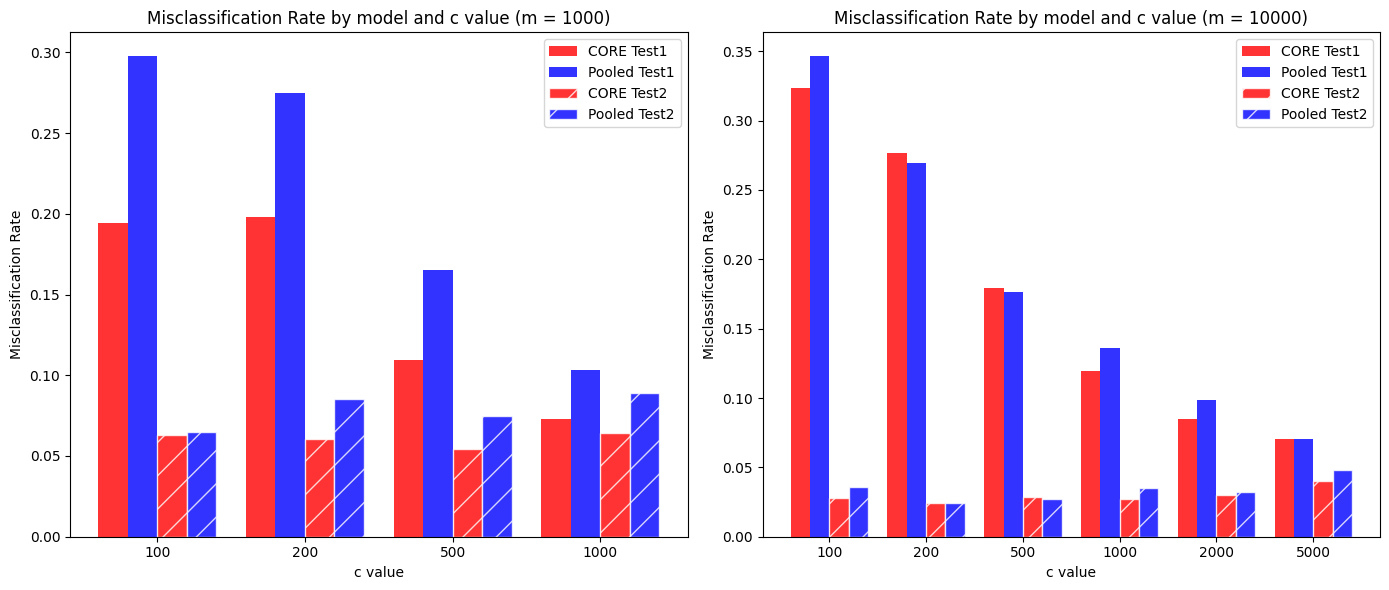

In [13]:
data = []
with open('models_decay/misclass_rates_models.txt', 'r') as file:
    for line in file.readlines():
        parts = line.split(', ')
        model = parts[0].split('_')
        model_name = model[1]
        m = int(model[2])
        c = int(model[3])
        test1_misclass = float(parts[1].split(': ')[1])
        test2_misclass = float(parts[2].split(': ')[1])
        data.append([model_name, m, c, test1_misclass, test2_misclass])

df = pd.DataFrame(data, columns=['Model', 'm', 'c', 'Test1', 'Test2'])

df_pivot = df.pivot_table(index=['m', 'c'], columns='Model', values=['Test1', 'Test2']).reset_index()
df_pivot.columns = ['m', 'c', 'Core_Test1', 'Pooled_Test1', 'Core_Test2', 'Pooled_Test2']

def plot_bars(df, m_value, ax):
    subset = df[df['m'] == m_value]

    bar_width = 0.2
    index = np.arange(len(subset))
    opacity = 0.8

    rects1 = ax.bar(index - bar_width, subset['Core_Test1'], bar_width, alpha=opacity, color='red', label='CORE Test1')
    rects2 = ax.bar(index, subset['Pooled_Test1'], bar_width, alpha=opacity, color='blue', label='Pooled Test1')
    rects3 = ax.bar(index + bar_width, subset['Core_Test2'], bar_width, alpha=opacity, color='red', edgecolor='white', hatch='/', label='CORE Test2')
    rects4 = ax.bar(index + 2 * bar_width, subset['Pooled_Test2'], bar_width, alpha=opacity, color='blue', edgecolor='white', hatch='/', label='Pooled Test2')

    ax.set_xlabel('c value')
    ax.set_ylabel('Misclassification Rate')
    ax.set_title(f'Misclassification Rate by model and c value (m = {m_value})')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(subset['c'])
    ax.legend()

fig, axs = plt.subplots(1, len(df['m'].unique()), figsize=(14, 6))

for i, m_val in enumerate(df['m'].unique()):
    plot_bars(df_pivot, m_val, axs[i])

plt.tight_layout()
plt.show()


#### Bidirectional rotations

In [14]:
config = configs.mnist_experiment()
m = 1000
c = 100
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist",m,c,bidirec=True)

print(f"\n Pooled model: {m} samples + {c} augmentations")
config.lambda_core = 0.0
state_core = train.train_and_evaluate(config, workdir=f"models_bidirec/mnist_pooled_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

print(f"\n\n CoRe model: {m} samples + {c} augmentations")
config.lambda_core = 0.2
state_pooled = train.train_and_evaluate(config, workdir=f"models_bidirec/mnist_core_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

INFO:absl:Load dataset info from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:For 'mnist/3.0.1': fields info.[citation, splits, supervised_keys, module_name] differ on disk and in the code. Keeping the one from code.
INFO:absl:Reusing dataset mnist (/Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1)
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split train, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split test, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1



 Pooled model: 1000 samples + 100 augmentations


INFO:absl:epoch: 1, train_loss: 1.5912, train_accuracy: 48.52, test1_accuracy: 23.21, test2_accuracy: 78.81, core_penalty: 0.8300
INFO:absl:epoch: 2, train_loss: 0.7547, train_accuracy: 80.19, test1_accuracy: 36.72, test2_accuracy: 88.58, core_penalty: 1.8246
INFO:absl:epoch: 3, train_loss: 0.4420, train_accuracy: 90.28, test1_accuracy: 40.90, test2_accuracy: 90.96, core_penalty: 2.1430
INFO:absl:epoch: 4, train_loss: 0.3144, train_accuracy: 94.35, test1_accuracy: 51.67, test2_accuracy: 92.51, core_penalty: 4.1190
INFO:absl:epoch: 5, train_loss: 0.2156, train_accuracy: 98.24, test1_accuracy: 53.80, test2_accuracy: 92.29, core_penalty: 1.1372
INFO:absl:epoch: 6, train_loss: 0.1940, train_accuracy: 98.61, test1_accuracy: 53.84, test2_accuracy: 92.51, core_penalty: 3.6920
INFO:absl:epoch: 7, train_loss: 0.1805, train_accuracy: 98.61, test1_accuracy: 52.07, test2_accuracy: 92.84, core_penalty: 5.2555
INFO:absl:epoch: 8, train_loss: 0.1701, train_accuracy: 99.07, test1_accuracy: 54.71, test



 CoRe model: 1000 samples + 100 augmentations


INFO:absl:epoch: 1, train_loss: 1.6699, train_accuracy: 48.89, test1_accuracy: 26.82, test2_accuracy: 82.61, core_penalty: 0.5083
INFO:absl:epoch: 2, train_loss: 0.9317, train_accuracy: 81.39, test1_accuracy: 39.84, test2_accuracy: 87.11, core_penalty: 0.5091
INFO:absl:epoch: 3, train_loss: 0.7202, train_accuracy: 88.33, test1_accuracy: 44.70, test2_accuracy: 89.94, core_penalty: 1.1173
INFO:absl:epoch: 4, train_loss: 0.5708, train_accuracy: 93.61, test1_accuracy: 51.76, test2_accuracy: 91.54, core_penalty: 0.5324
INFO:absl:epoch: 5, train_loss: 0.4188, train_accuracy: 94.72, test1_accuracy: 53.62, test2_accuracy: 91.78, core_penalty: 0.2968
INFO:absl:epoch: 6, train_loss: 0.4684, train_accuracy: 95.09, test1_accuracy: 55.39, test2_accuracy: 91.87, core_penalty: 0.6881
INFO:absl:epoch: 7, train_loss: 0.4302, train_accuracy: 97.50, test1_accuracy: 57.25, test2_accuracy: 92.46, core_penalty: 0.5687
INFO:absl:epoch: 8, train_loss: 0.4978, train_accuracy: 97.78, test1_accuracy: 56.13, test

In [15]:
config = configs.mnist_experiment()
m = 1000
c = 200
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist",m,c,bidirec=True)

print(f"\n Pooled model: {m} samples + {c} augmentations")
config.lambda_core = 0.0
state_core = train.train_and_evaluate(config, workdir=f"models_bidirec/mnist_pooled_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

print(f"\n\n CoRe model: {m} samples + {c} augmentations")
config.lambda_core = 0.2
state_pooled = train.train_and_evaluate(config, workdir=f"models_bidirec/mnist_core_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

INFO:absl:Load dataset info from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:For 'mnist/3.0.1': fields info.[citation, splits, supervised_keys, module_name] differ on disk and in the code. Keeping the one from code.
INFO:absl:Reusing dataset mnist (/Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1)
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split train, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split test, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1



 Pooled model: 1000 samples + 200 augmentations


INFO:absl:epoch: 1, train_loss: 1.5372, train_accuracy: 55.25, test1_accuracy: 32.78, test2_accuracy: 78.83, core_penalty: 0.8468
INFO:absl:epoch: 2, train_loss: 0.7498, train_accuracy: 81.33, test1_accuracy: 50.17, test2_accuracy: 87.70, core_penalty: 0.8998
INFO:absl:epoch: 3, train_loss: 0.4960, train_accuracy: 88.50, test1_accuracy: 58.07, test2_accuracy: 90.34, core_penalty: 1.3068
INFO:absl:epoch: 4, train_loss: 0.3540, train_accuracy: 94.17, test1_accuracy: 65.10, test2_accuracy: 92.08, core_penalty: 1.5502
INFO:absl:epoch: 5, train_loss: 0.2621, train_accuracy: 97.17, test1_accuracy: 68.86, test2_accuracy: 92.48, core_penalty: 1.8559
INFO:absl:epoch: 6, train_loss: 0.2063, train_accuracy: 98.50, test1_accuracy: 68.04, test2_accuracy: 92.52, core_penalty: 2.0641
INFO:absl:epoch: 7, train_loss: 0.1744, train_accuracy: 99.75, test1_accuracy: 67.82, test2_accuracy: 91.59, core_penalty: 4.2734
INFO:absl:epoch: 8, train_loss: 0.1572, train_accuracy: 99.83, test1_accuracy: 67.69, test



 CoRe model: 1000 samples + 200 augmentations


INFO:absl:epoch: 1, train_loss: 1.5587, train_accuracy: 56.83, test1_accuracy: 40.03, test2_accuracy: 82.21, core_penalty: 0.4703
INFO:absl:epoch: 2, train_loss: 0.8383, train_accuracy: 82.58, test1_accuracy: 54.63, test2_accuracy: 87.07, core_penalty: 0.5640
INFO:absl:epoch: 3, train_loss: 0.6011, train_accuracy: 87.42, test1_accuracy: 60.25, test2_accuracy: 88.38, core_penalty: 0.2750
INFO:absl:epoch: 4, train_loss: 0.5500, train_accuracy: 92.25, test1_accuracy: 65.36, test2_accuracy: 90.94, core_penalty: 0.6981
INFO:absl:epoch: 5, train_loss: 0.4849, train_accuracy: 95.33, test1_accuracy: 68.06, test2_accuracy: 92.18, core_penalty: 0.4329
INFO:absl:epoch: 6, train_loss: 0.3732, train_accuracy: 97.25, test1_accuracy: 68.18, test2_accuracy: 92.03, core_penalty: 0.3971
INFO:absl:epoch: 7, train_loss: 0.4577, train_accuracy: 97.17, test1_accuracy: 69.02, test2_accuracy: 91.34, core_penalty: 0.6518
INFO:absl:epoch: 8, train_loss: 0.4077, train_accuracy: 97.83, test1_accuracy: 70.63, test

In [16]:
config = configs.mnist_experiment()
m = 1000
c = 500
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist",m,c,bidirec=True)

print(f"\n Pooled model: {m} samples + {c} augmentations")
config.lambda_core = 0.0
state_core = train.train_and_evaluate(config, workdir=f"models_bidirec/mnist_pooled_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

print(f"\n\n CoRe model: {m} samples + {c} augmentations")
config.lambda_core = 0.2
state_pooled = train.train_and_evaluate(config, workdir=f"models_bidirec/mnist_core_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

INFO:absl:Load dataset info from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:For 'mnist/3.0.1': fields info.[citation, splits, supervised_keys, module_name] differ on disk and in the code. Keeping the one from code.
INFO:absl:Reusing dataset mnist (/Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1)
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split train, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split test, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1



 Pooled model: 1000 samples + 500 augmentations


INFO:absl:epoch: 1, train_loss: 1.5109, train_accuracy: 51.60, test1_accuracy: 45.78, test2_accuracy: 81.22, core_penalty: 0.6704
INFO:absl:epoch: 2, train_loss: 0.7439, train_accuracy: 80.14, test1_accuracy: 66.19, test2_accuracy: 89.22, core_penalty: 0.8404
INFO:absl:epoch: 3, train_loss: 0.4799, train_accuracy: 89.58, test1_accuracy: 73.89, test2_accuracy: 89.85, core_penalty: 1.3835
INFO:absl:epoch: 4, train_loss: 0.3588, train_accuracy: 93.40, test1_accuracy: 76.30, test2_accuracy: 91.18, core_penalty: 2.0566
INFO:absl:epoch: 5, train_loss: 0.2785, train_accuracy: 97.08, test1_accuracy: 77.21, test2_accuracy: 91.63, core_penalty: 2.6665
INFO:absl:epoch: 6, train_loss: 0.2248, train_accuracy: 97.99, test1_accuracy: 78.18, test2_accuracy: 91.48, core_penalty: 3.5272
INFO:absl:epoch: 7, train_loss: 0.2142, train_accuracy: 98.40, test1_accuracy: 76.16, test2_accuracy: 92.00, core_penalty: 3.7564
INFO:absl:epoch: 8, train_loss: 0.1903, train_accuracy: 99.38, test1_accuracy: 78.20, test



 CoRe model: 1000 samples + 500 augmentations


INFO:absl:epoch: 1, train_loss: 1.6041, train_accuracy: 53.19, test1_accuracy: 48.94, test2_accuracy: 77.95, core_penalty: 0.4133
INFO:absl:epoch: 2, train_loss: 0.8635, train_accuracy: 80.42, test1_accuracy: 66.14, test2_accuracy: 88.28, core_penalty: 0.4269
INFO:absl:epoch: 3, train_loss: 0.6264, train_accuracy: 89.86, test1_accuracy: 72.67, test2_accuracy: 89.28, core_penalty: 0.5401
INFO:absl:epoch: 4, train_loss: 0.5447, train_accuracy: 92.50, test1_accuracy: 77.05, test2_accuracy: 91.73, core_penalty: 0.5074
INFO:absl:epoch: 5, train_loss: 0.4762, train_accuracy: 96.04, test1_accuracy: 79.21, test2_accuracy: 91.85, core_penalty: 0.5039
INFO:absl:epoch: 6, train_loss: 0.4172, train_accuracy: 96.81, test1_accuracy: 79.87, test2_accuracy: 91.40, core_penalty: 0.4720
INFO:absl:epoch: 7, train_loss: 0.4086, train_accuracy: 97.36, test1_accuracy: 77.56, test2_accuracy: 91.57, core_penalty: 0.4506
INFO:absl:epoch: 8, train_loss: 0.3981, train_accuracy: 98.47, test1_accuracy: 80.72, test

In [17]:
config = configs.mnist_experiment()
m = 1000
c = 1000
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist",m,c,bidirec=True)

print(f"\n Pooled model: {m} samples + {c} augmentations")
config.lambda_core = 0.0
state_core = train.train_and_evaluate(config, workdir=f"models_bidirec/mnist_pooled_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

print(f"\n\n CoRe model: {m} samples + {c} augmentations")
config.lambda_core = 0.2
state_pooled = train.train_and_evaluate(config, workdir=f"models_bidirec/mnist_core_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

INFO:absl:Load dataset info from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:For 'mnist/3.0.1': fields info.[citation, splits, supervised_keys, module_name] differ on disk and in the code. Keeping the one from code.
INFO:absl:Reusing dataset mnist (/Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1)
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split train, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split test, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1



 Pooled model: 1000 samples + 1000 augmentations


INFO:absl:epoch: 1, train_loss: 1.6552, train_accuracy: 48.44, test1_accuracy: 62.46, test2_accuracy: 81.14, core_penalty: 0.1959
INFO:absl:epoch: 2, train_loss: 0.7867, train_accuracy: 78.49, test1_accuracy: 77.93, test2_accuracy: 85.73, core_penalty: 0.8860
INFO:absl:epoch: 3, train_loss: 0.5204, train_accuracy: 88.49, test1_accuracy: 82.67, test2_accuracy: 90.05, core_penalty: 1.2273
INFO:absl:epoch: 4, train_loss: 0.3769, train_accuracy: 93.39, test1_accuracy: 84.83, test2_accuracy: 90.56, core_penalty: 2.0033
INFO:absl:epoch: 5, train_loss: 0.3151, train_accuracy: 95.73, test1_accuracy: 84.12, test2_accuracy: 90.01, core_penalty: 2.5170
INFO:absl:epoch: 6, train_loss: 0.2760, train_accuracy: 96.93, test1_accuracy: 85.16, test2_accuracy: 91.54, core_penalty: 2.8960
INFO:absl:epoch: 7, train_loss: 0.2410, train_accuracy: 97.92, test1_accuracy: 86.63, test2_accuracy: 91.30, core_penalty: 4.0100
INFO:absl:epoch: 8, train_loss: 0.2336, train_accuracy: 97.76, test1_accuracy: 84.15, test



 CoRe model: 1000 samples + 1000 augmentations


INFO:absl:epoch: 1, train_loss: 1.6870, train_accuracy: 49.38, test1_accuracy: 62.85, test2_accuracy: 80.86, core_penalty: 0.1466
INFO:absl:epoch: 2, train_loss: 0.8857, train_accuracy: 78.85, test1_accuracy: 78.36, test2_accuracy: 85.14, core_penalty: 0.4397
INFO:absl:epoch: 3, train_loss: 0.6560, train_accuracy: 86.61, test1_accuracy: 83.49, test2_accuracy: 90.66, core_penalty: 0.4497
INFO:absl:epoch: 4, train_loss: 0.5466, train_accuracy: 93.39, test1_accuracy: 85.35, test2_accuracy: 91.67, core_penalty: 0.5067
INFO:absl:epoch: 5, train_loss: 0.5079, train_accuracy: 94.11, test1_accuracy: 86.43, test2_accuracy: 91.66, core_penalty: 0.5081
INFO:absl:epoch: 6, train_loss: 0.5070, train_accuracy: 95.52, test1_accuracy: 84.57, test2_accuracy: 91.06, core_penalty: 0.5999
INFO:absl:epoch: 7, train_loss: 0.5266, train_accuracy: 96.15, test1_accuracy: 85.46, test2_accuracy: 91.00, core_penalty: 0.6777
INFO:absl:epoch: 8, train_loss: 0.5392, train_accuracy: 95.26, test1_accuracy: 87.22, test

In [18]:
config = configs.mnist_experiment()
m = 10000
c = 100
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist",m,c,bidirec=True)

print(f"\n Pooled model: {m} samples + {c} augmentations")
config.lambda_core = 0.0
state_core = train.train_and_evaluate(config, workdir=f"models_bidirec/mnist_pooled_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

print(f"\n\n CoRe model: {m} samples + {c} augmentations")
config.lambda_core = 0.2
state_pooled = train.train_and_evaluate(config, workdir=f"models_bidirec/mnist_core_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

INFO:absl:Load dataset info from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:For 'mnist/3.0.1': fields info.[citation, splits, supervised_keys, module_name] differ on disk and in the code. Keeping the one from code.
INFO:absl:Reusing dataset mnist (/Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1)
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split train, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split test, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1



 Pooled model: 10000 samples + 100 augmentations


INFO:absl:epoch: 1, train_loss: 0.5171, train_accuracy: 88.17, test1_accuracy: 42.90, test2_accuracy: 95.78, core_penalty: 0.0000
INFO:absl:epoch: 2, train_loss: 0.2588, train_accuracy: 95.94, test1_accuracy: 47.24, test2_accuracy: 95.72, core_penalty: 0.0388
INFO:absl:epoch: 3, train_loss: 0.2514, train_accuracy: 96.20, test1_accuracy: 45.76, test2_accuracy: 96.58, core_penalty: 0.0981
INFO:absl:epoch: 4, train_loss: 0.2244, train_accuracy: 96.75, test1_accuracy: 48.48, test2_accuracy: 97.07, core_penalty: 0.0741
INFO:absl:epoch: 5, train_loss: 0.2244, train_accuracy: 96.85, test1_accuracy: 48.22, test2_accuracy: 97.01, core_penalty: 0.0461
INFO:absl:epoch: 6, train_loss: 0.2068, train_accuracy: 97.42, test1_accuracy: 52.63, test2_accuracy: 97.06, core_penalty: 0.0890
INFO:absl:epoch: 7, train_loss: 0.2163, train_accuracy: 97.05, test1_accuracy: 49.70, test2_accuracy: 97.20, core_penalty: 0.0000
INFO:absl:epoch: 8, train_loss: 0.2052, train_accuracy: 97.30, test1_accuracy: 50.80, test



 CoRe model: 10000 samples + 100 augmentations


INFO:absl:epoch: 1, train_loss: 0.5171, train_accuracy: 88.17, test1_accuracy: 42.90, test2_accuracy: 95.78, core_penalty: 0.0000
INFO:absl:epoch: 2, train_loss: 0.2780, train_accuracy: 95.65, test1_accuracy: 44.41, test2_accuracy: 95.54, core_penalty: 0.0388
INFO:absl:epoch: 3, train_loss: 0.3127, train_accuracy: 95.53, test1_accuracy: 50.56, test2_accuracy: 97.31, core_penalty: 0.0731
INFO:absl:epoch: 4, train_loss: 0.2809, train_accuracy: 96.35, test1_accuracy: 51.30, test2_accuracy: 97.08, core_penalty: 0.0807
INFO:absl:epoch: 5, train_loss: 0.2338, train_accuracy: 96.85, test1_accuracy: 50.65, test2_accuracy: 96.90, core_penalty: 0.0222
INFO:absl:epoch: 6, train_loss: 0.2857, train_accuracy: 96.43, test1_accuracy: 54.70, test2_accuracy: 96.83, core_penalty: 0.0573
INFO:absl:epoch: 7, train_loss: 0.2083, train_accuracy: 97.55, test1_accuracy: 51.10, test2_accuracy: 97.03, core_penalty: 0.0000
INFO:absl:epoch: 8, train_loss: 0.1947, train_accuracy: 97.57, test1_accuracy: 48.56, test

In [19]:
config = configs.mnist_experiment()
m = 10000
c = 200
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist",m,c,bidirec=True)

print(f"\n Pooled model: {m} samples + {c} augmentations")
config.lambda_core = 0.0
state_core = train.train_and_evaluate(config, workdir=f"models_bidirec/mnist_pooled_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

print(f"\n\n CoRe model: {m} samples + {c} augmentations")
config.lambda_core = 0.2
state_pooled = train.train_and_evaluate(config, workdir=f"models_bidirec/mnist_core_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

INFO:absl:Load dataset info from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:For 'mnist/3.0.1': fields info.[citation, splits, supervised_keys, module_name] differ on disk and in the code. Keeping the one from code.
INFO:absl:Reusing dataset mnist (/Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1)
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split train, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split test, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1



 Pooled model: 10000 samples + 200 augmentations


INFO:absl:epoch: 1, train_loss: 0.5135, train_accuracy: 87.53, test1_accuracy: 50.31, test2_accuracy: 94.51, core_penalty: 0.0000
INFO:absl:epoch: 2, train_loss: 0.2693, train_accuracy: 95.49, test1_accuracy: 54.39, test2_accuracy: 95.32, core_penalty: 0.1206
INFO:absl:epoch: 3, train_loss: 0.2356, train_accuracy: 96.46, test1_accuracy: 58.42, test2_accuracy: 96.81, core_penalty: 0.2140
INFO:absl:epoch: 4, train_loss: 0.2250, train_accuracy: 96.66, test1_accuracy: 60.48, test2_accuracy: 96.66, core_penalty: 0.0000
INFO:absl:epoch: 5, train_loss: 0.2150, train_accuracy: 96.95, test1_accuracy: 58.93, test2_accuracy: 95.84, core_penalty: 0.1519
INFO:absl:epoch: 6, train_loss: 0.2229, train_accuracy: 97.03, test1_accuracy: 57.32, test2_accuracy: 96.81, core_penalty: 0.0976
INFO:absl:epoch: 7, train_loss: 0.2049, train_accuracy: 97.32, test1_accuracy: 54.50, test2_accuracy: 96.50, core_penalty: 0.0431
INFO:absl:epoch: 8, train_loss: 0.2070, train_accuracy: 97.08, test1_accuracy: 54.47, test



 CoRe model: 10000 samples + 200 augmentations


INFO:absl:epoch: 1, train_loss: 0.5135, train_accuracy: 87.53, test1_accuracy: 50.31, test2_accuracy: 94.51, core_penalty: 0.0000
INFO:absl:epoch: 2, train_loss: 0.3540, train_accuracy: 94.43, test1_accuracy: 46.09, test2_accuracy: 95.41, core_penalty: 0.1327
INFO:absl:epoch: 3, train_loss: 0.3803, train_accuracy: 94.88, test1_accuracy: 50.27, test2_accuracy: 96.20, core_penalty: 0.1550
INFO:absl:epoch: 4, train_loss: 0.2695, train_accuracy: 96.70, test1_accuracy: 61.18, test2_accuracy: 97.07, core_penalty: 0.0000
INFO:absl:epoch: 5, train_loss: 0.2895, train_accuracy: 96.22, test1_accuracy: 61.86, test2_accuracy: 96.55, core_penalty: 0.0873
INFO:absl:epoch: 6, train_loss: 0.2351, train_accuracy: 97.13, test1_accuracy: 54.70, test2_accuracy: 96.78, core_penalty: 0.0470
INFO:absl:epoch: 7, train_loss: 0.2443, train_accuracy: 96.89, test1_accuracy: 60.12, test2_accuracy: 96.75, core_penalty: 0.0289
INFO:absl:epoch: 8, train_loss: 0.3330, train_accuracy: 95.86, test1_accuracy: 55.50, test

In [20]:
config = configs.mnist_experiment()
m = 10000
c = 500
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist",m,c,bidirec=True)

print(f"\n Pooled model: {m} samples + {c} augmentations")
config.lambda_core = 0.0
state_core = train.train_and_evaluate(config, workdir=f"models_bidirec/mnist_pooled_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

print(f"\n\n CoRe model: {m} samples + {c} augmentations")
config.lambda_core = 0.2
state_pooled = train.train_and_evaluate(config, workdir=f"models_bidirec/mnist_core_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

INFO:absl:Load dataset info from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:For 'mnist/3.0.1': fields info.[citation, splits, supervised_keys, module_name] differ on disk and in the code. Keeping the one from code.
INFO:absl:Reusing dataset mnist (/Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1)
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split train, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split test, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1



 Pooled model: 10000 samples + 500 augmentations


INFO:absl:epoch: 1, train_loss: 0.5654, train_accuracy: 86.40, test1_accuracy: 60.75, test2_accuracy: 95.81, core_penalty: 0.1292
INFO:absl:epoch: 2, train_loss: 0.3091, train_accuracy: 94.58, test1_accuracy: 67.33, test2_accuracy: 96.26, core_penalty: 0.1701
INFO:absl:epoch: 3, train_loss: 0.2759, train_accuracy: 95.52, test1_accuracy: 66.98, test2_accuracy: 95.98, core_penalty: 0.1692
INFO:absl:epoch: 4, train_loss: 0.2602, train_accuracy: 96.30, test1_accuracy: 64.97, test2_accuracy: 95.95, core_penalty: 0.2877
INFO:absl:epoch: 5, train_loss: 0.2547, train_accuracy: 96.34, test1_accuracy: 71.37, test2_accuracy: 96.84, core_penalty: 0.0323
INFO:absl:epoch: 6, train_loss: 0.2460, train_accuracy: 96.61, test1_accuracy: 69.79, test2_accuracy: 96.97, core_penalty: 0.0764
INFO:absl:epoch: 7, train_loss: 0.2376, train_accuracy: 96.87, test1_accuracy: 71.54, test2_accuracy: 96.84, core_penalty: 0.1426
INFO:absl:epoch: 8, train_loss: 0.2217, train_accuracy: 97.07, test1_accuracy: 69.21, test



 CoRe model: 10000 samples + 500 augmentations


INFO:absl:epoch: 1, train_loss: 0.6271, train_accuracy: 85.61, test1_accuracy: 57.82, test2_accuracy: 95.25, core_penalty: 0.1109
INFO:absl:epoch: 2, train_loss: 0.3665, train_accuracy: 94.24, test1_accuracy: 65.28, test2_accuracy: 95.73, core_penalty: 0.0838
INFO:absl:epoch: 3, train_loss: 0.3923, train_accuracy: 94.27, test1_accuracy: 67.42, test2_accuracy: 95.66, core_penalty: 0.1853
INFO:absl:epoch: 4, train_loss: 0.4082, train_accuracy: 94.90, test1_accuracy: 62.97, test2_accuracy: 96.16, core_penalty: 0.2441
INFO:absl:epoch: 5, train_loss: 0.3194, train_accuracy: 95.78, test1_accuracy: 71.91, test2_accuracy: 96.76, core_penalty: 0.0151
INFO:absl:epoch: 6, train_loss: 0.2652, train_accuracy: 96.47, test1_accuracy: 69.87, test2_accuracy: 95.79, core_penalty: 0.0442
INFO:absl:epoch: 7, train_loss: 0.2864, train_accuracy: 96.28, test1_accuracy: 66.19, test2_accuracy: 96.66, core_penalty: 0.0873
INFO:absl:epoch: 8, train_loss: 0.3145, train_accuracy: 96.02, test1_accuracy: 68.90, test

In [21]:
config = configs.mnist_experiment()
m = 10000
c = 1000
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist",m,c,bidirec=True)

print(f"\n Pooled model: {m} samples + {c} augmentations")
config.lambda_core = 0.0
state_core = train.train_and_evaluate(config, workdir=f"models_bidirec/mnist_pooled_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

print(f"\n\n CoRe model: {m} samples + {c} augmentations")
config.lambda_core = 0.2
state_pooled = train.train_and_evaluate(config, workdir=f"models_bidirec/mnist_core_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

INFO:absl:Load dataset info from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:For 'mnist/3.0.1': fields info.[citation, splits, supervised_keys, module_name] differ on disk and in the code. Keeping the one from code.
INFO:absl:Reusing dataset mnist (/Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1)
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split train, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split test, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1



 Pooled model: 10000 samples + 1000 augmentations


INFO:absl:epoch: 1, train_loss: 0.5853, train_accuracy: 85.96, test1_accuracy: 71.84, test2_accuracy: 95.33, core_penalty: 0.2177
INFO:absl:epoch: 2, train_loss: 0.3292, train_accuracy: 94.24, test1_accuracy: 74.35, test2_accuracy: 95.16, core_penalty: 0.1486
INFO:absl:epoch: 3, train_loss: 0.2846, train_accuracy: 95.46, test1_accuracy: 80.42, test2_accuracy: 96.09, core_penalty: 0.2850
INFO:absl:epoch: 4, train_loss: 0.2798, train_accuracy: 95.89, test1_accuracy: 74.27, test2_accuracy: 95.61, core_penalty: 0.4397
INFO:absl:epoch: 5, train_loss: 0.2653, train_accuracy: 96.40, test1_accuracy: 79.21, test2_accuracy: 97.11, core_penalty: 0.2525
INFO:absl:epoch: 6, train_loss: 0.2626, train_accuracy: 96.18, test1_accuracy: 77.89, test2_accuracy: 96.74, core_penalty: 0.3695
INFO:absl:epoch: 7, train_loss: 0.2512, train_accuracy: 96.47, test1_accuracy: 78.39, test2_accuracy: 96.81, core_penalty: 0.2507
INFO:absl:epoch: 8, train_loss: 0.2459, train_accuracy: 96.81, test1_accuracy: 77.88, test



 CoRe model: 10000 samples + 1000 augmentations


INFO:absl:epoch: 1, train_loss: 0.6677, train_accuracy: 85.19, test1_accuracy: 70.75, test2_accuracy: 95.29, core_penalty: 0.1853
INFO:absl:epoch: 2, train_loss: 0.3806, train_accuracy: 93.86, test1_accuracy: 73.12, test2_accuracy: 95.61, core_penalty: 0.0782
INFO:absl:epoch: 3, train_loss: 0.4220, train_accuracy: 93.95, test1_accuracy: 70.60, test2_accuracy: 94.54, core_penalty: 0.2257
INFO:absl:epoch: 4, train_loss: 0.4527, train_accuracy: 94.60, test1_accuracy: 79.16, test2_accuracy: 96.62, core_penalty: 0.2397
INFO:absl:epoch: 5, train_loss: 0.3865, train_accuracy: 95.27, test1_accuracy: 77.90, test2_accuracy: 97.05, core_penalty: 0.1821
INFO:absl:epoch: 6, train_loss: 0.3885, train_accuracy: 95.14, test1_accuracy: 79.74, test2_accuracy: 97.06, core_penalty: 0.1880
INFO:absl:epoch: 7, train_loss: 0.3494, train_accuracy: 95.88, test1_accuracy: 78.98, test2_accuracy: 96.82, core_penalty: 0.1620
INFO:absl:epoch: 8, train_loss: 0.3779, train_accuracy: 95.24, test1_accuracy: 79.89, test

In [22]:
config = configs.mnist_experiment()
m = 10000
c = 2000
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist",m,c,bidirec=True)

print(f"\n Pooled model: {m} samples + {c} augmentations")
config.lambda_core = 0.0
state_core = train.train_and_evaluate(config, workdir=f"models_bidirec/mnist_pooled_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

print(f"\n\n CoRe model: {m} samples + {c} augmentations")
config.lambda_core = 0.2
state_pooled = train.train_and_evaluate(config, workdir=f"models_bidirec/mnist_core_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

INFO:absl:Load dataset info from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:For 'mnist/3.0.1': fields info.[citation, splits, supervised_keys, module_name] differ on disk and in the code. Keeping the one from code.
INFO:absl:Reusing dataset mnist (/Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1)
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split train, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split test, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1



 Pooled model: 10000 samples + 2000 augmentations


INFO:absl:epoch: 1, train_loss: 0.6448, train_accuracy: 84.56, test1_accuracy: 78.94, test2_accuracy: 95.32, core_penalty: 0.3151
INFO:absl:epoch: 2, train_loss: 0.3544, train_accuracy: 93.33, test1_accuracy: 79.37, test2_accuracy: 96.00, core_penalty: 0.2459
INFO:absl:epoch: 3, train_loss: 0.3307, train_accuracy: 94.42, test1_accuracy: 83.14, test2_accuracy: 95.20, core_penalty: 0.2899
INFO:absl:epoch: 4, train_loss: 0.3083, train_accuracy: 94.99, test1_accuracy: 81.59, test2_accuracy: 96.48, core_penalty: 0.3396
INFO:absl:epoch: 5, train_loss: 0.2914, train_accuracy: 95.74, test1_accuracy: 86.05, test2_accuracy: 96.91, core_penalty: 0.2813
INFO:absl:epoch: 6, train_loss: 0.2806, train_accuracy: 95.86, test1_accuracy: 86.00, test2_accuracy: 96.96, core_penalty: 0.2511
INFO:absl:epoch: 7, train_loss: 0.2760, train_accuracy: 95.97, test1_accuracy: 84.47, test2_accuracy: 96.79, core_penalty: 0.1075
INFO:absl:epoch: 8, train_loss: 0.2708, train_accuracy: 96.17, test1_accuracy: 84.76, test



 CoRe model: 10000 samples + 2000 augmentations


INFO:absl:epoch: 1, train_loss: 0.7311, train_accuracy: 83.28, test1_accuracy: 76.81, test2_accuracy: 95.07, core_penalty: 0.2279
INFO:absl:epoch: 2, train_loss: 0.4579, train_accuracy: 92.46, test1_accuracy: 80.56, test2_accuracy: 95.05, core_penalty: 0.1766
INFO:absl:epoch: 3, train_loss: 0.4303, train_accuracy: 93.61, test1_accuracy: 82.67, test2_accuracy: 95.76, core_penalty: 0.1925
INFO:absl:epoch: 4, train_loss: 0.4544, train_accuracy: 93.53, test1_accuracy: 81.54, test2_accuracy: 94.22, core_penalty: 0.2583
INFO:absl:epoch: 5, train_loss: 0.4058, train_accuracy: 94.52, test1_accuracy: 84.37, test2_accuracy: 96.08, core_penalty: 0.1556
INFO:absl:epoch: 6, train_loss: 0.3782, train_accuracy: 95.02, test1_accuracy: 86.44, test2_accuracy: 96.43, core_penalty: 0.1546
INFO:absl:epoch: 7, train_loss: 0.3350, train_accuracy: 95.64, test1_accuracy: 83.32, test2_accuracy: 96.62, core_penalty: 0.0906
INFO:absl:epoch: 8, train_loss: 0.3737, train_accuracy: 95.32, test1_accuracy: 79.92, test

In [23]:
config = configs.mnist_experiment()
m = 10000
c = 5000
train_ds, test1_ds, test2_ds = data_handler.load_datasets("mnist",m,c,bidirec=True)

print(f"\n Pooled model: {m} samples + {c} augmentations")
config.lambda_core = 0.0
state_core = train.train_and_evaluate(config, workdir=f"models_bidirec/mnist_pooled_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

print(f"\n\n CoRe model: {m} samples + {c} augmentations")
config.lambda_core = 0.2
state_pooled = train.train_and_evaluate(config, workdir=f"models_bidirec/mnist_core_{m}_{c}", train_ds=train_ds, test1_ds=test1_ds, test2_ds=test2_ds)

INFO:absl:Load dataset info from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:For 'mnist/3.0.1': fields info.[citation, splits, supervised_keys, module_name] differ on disk and in the code. Keeping the one from code.
INFO:absl:Reusing dataset mnist (/Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1)
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split train, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1
INFO:absl:Creating a tf.data.Dataset reading 1 files located in folders: /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1.
INFO:absl:Constructing tf.data.Dataset mnist for split test, from /Users/lukasecilmis/tensorflow_datasets/mnist/3.0.1



 Pooled model: 10000 samples + 5000 augmentations


INFO:absl:epoch: 1, train_loss: 0.6699, train_accuracy: 83.55, test1_accuracy: 87.16, test2_accuracy: 94.74, core_penalty: 0.2619
INFO:absl:epoch: 2, train_loss: 0.3895, train_accuracy: 93.11, test1_accuracy: 88.69, test2_accuracy: 96.19, core_penalty: 0.4171
INFO:absl:epoch: 3, train_loss: 0.3558, train_accuracy: 94.16, test1_accuracy: 88.85, test2_accuracy: 95.57, core_penalty: 0.3794
INFO:absl:epoch: 4, train_loss: 0.3381, train_accuracy: 94.73, test1_accuracy: 90.62, test2_accuracy: 96.74, core_penalty: 0.3843
INFO:absl:epoch: 5, train_loss: 0.3252, train_accuracy: 95.25, test1_accuracy: 90.01, test2_accuracy: 96.36, core_penalty: 0.5946
INFO:absl:epoch: 6, train_loss: 0.3329, train_accuracy: 94.94, test1_accuracy: 91.50, test2_accuracy: 96.64, core_penalty: 0.3589
INFO:absl:epoch: 7, train_loss: 0.3174, train_accuracy: 95.36, test1_accuracy: 90.59, test2_accuracy: 96.20, core_penalty: 0.4920
INFO:absl:epoch: 8, train_loss: 0.3208, train_accuracy: 95.17, test1_accuracy: 91.56, test



 CoRe model: 10000 samples + 5000 augmentations


INFO:absl:epoch: 1, train_loss: 0.7794, train_accuracy: 82.35, test1_accuracy: 85.90, test2_accuracy: 94.10, core_penalty: 0.2279
INFO:absl:epoch: 2, train_loss: 0.5419, train_accuracy: 91.55, test1_accuracy: 87.77, test2_accuracy: 95.24, core_penalty: 0.2705
INFO:absl:epoch: 3, train_loss: 0.5078, train_accuracy: 92.67, test1_accuracy: 89.03, test2_accuracy: 95.72, core_penalty: 0.2732
INFO:absl:epoch: 4, train_loss: 0.4856, train_accuracy: 93.59, test1_accuracy: 89.99, test2_accuracy: 95.53, core_penalty: 0.2323
INFO:absl:epoch: 5, train_loss: 0.4868, train_accuracy: 93.89, test1_accuracy: 86.59, test2_accuracy: 95.16, core_penalty: 0.2965
INFO:absl:epoch: 6, train_loss: 0.4783, train_accuracy: 93.98, test1_accuracy: 89.40, test2_accuracy: 96.02, core_penalty: 0.2869
INFO:absl:epoch: 7, train_loss: 0.4575, train_accuracy: 94.49, test1_accuracy: 90.31, test2_accuracy: 96.27, core_penalty: 0.2756
INFO:absl:epoch: 8, train_loss: 0.4373, train_accuracy: 94.28, test1_accuracy: 90.89, test

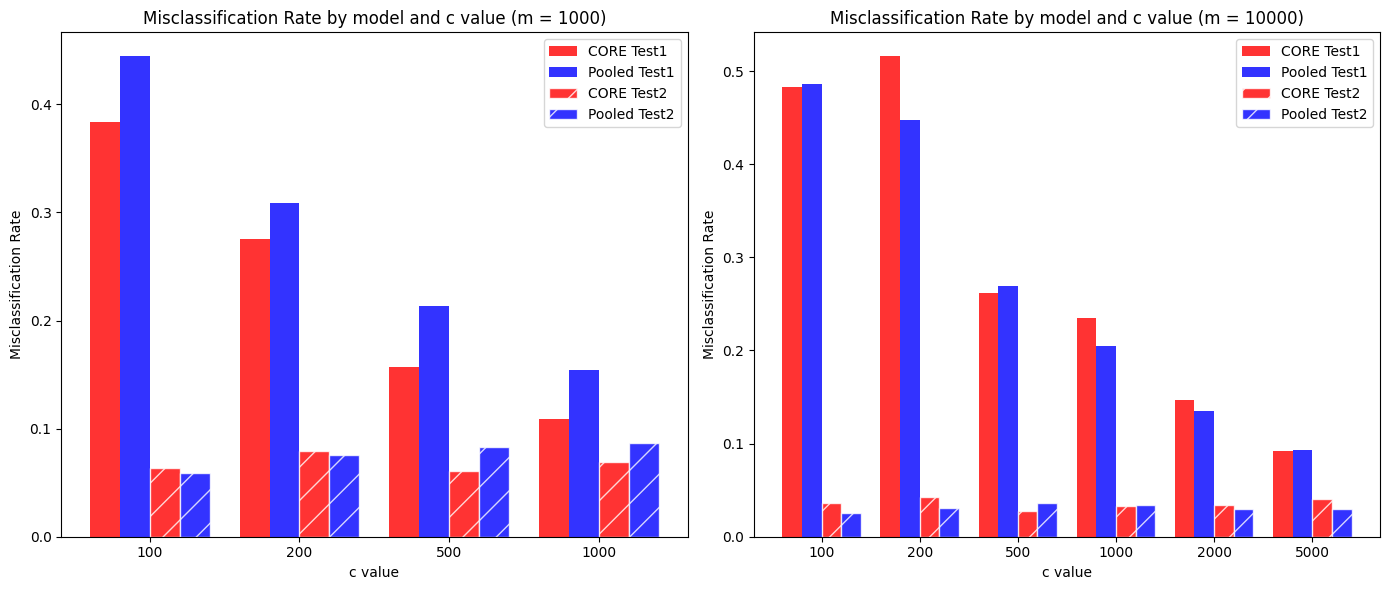

In [24]:
data = []
with open('models_bidirec/misclass_rates_models.txt', 'r') as file:
    for line in file.readlines():
        parts = line.split(', ')
        model = parts[0].split('_')
        model_name = model[1]
        m = int(model[2])
        c = int(model[3])
        test1_misclass = float(parts[1].split(': ')[1])
        test2_misclass = float(parts[2].split(': ')[1])
        data.append([model_name, m, c, test1_misclass, test2_misclass])

df = pd.DataFrame(data, columns=['Model', 'm', 'c', 'Test1', 'Test2'])

df_pivot = df.pivot_table(index=['m', 'c'], columns='Model', values=['Test1', 'Test2']).reset_index()
df_pivot.columns = ['m', 'c', 'Core_Test1', 'Pooled_Test1', 'Core_Test2', 'Pooled_Test2']

def plot_bars(df, m_value, ax):
    subset = df[df['m'] == m_value]

    bar_width = 0.2
    index = np.arange(len(subset))
    opacity = 0.8

    rects1 = ax.bar(index - bar_width, subset['Core_Test1'], bar_width, alpha=opacity, color='red', label='CORE Test1')
    rects2 = ax.bar(index, subset['Pooled_Test1'], bar_width, alpha=opacity, color='blue', label='Pooled Test1')
    rects3 = ax.bar(index + bar_width, subset['Core_Test2'], bar_width, alpha=opacity, color='red', edgecolor='white', hatch='/', label='CORE Test2')
    rects4 = ax.bar(index + 2 * bar_width, subset['Pooled_Test2'], bar_width, alpha=opacity, color='blue', edgecolor='white', hatch='/', label='Pooled Test2')

    ax.set_xlabel('c value')
    ax.set_ylabel('Misclassification Rate')
    ax.set_title(f'Misclassification Rate by model and c value (m = {m_value})')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(subset['c'])
    ax.legend()

fig, axs = plt.subplots(1, len(df['m'].unique()), figsize=(14, 6))

for i, m_val in enumerate(df['m'].unique()):
    plot_bars(df_pivot, m_val, axs[i])

plt.tight_layout()
plt.show()